<a href="https://colab.research.google.com/github/vivekvj18/ML_PROJECT/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EDA: Step 0 - Import Libraries
import pandas as pd        # Data handling
import numpy as np         # Numerical operations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns      # Advanced plotting
sns.set(style="whitegrid")


In [ ]:
# EDA: Step 1 - Upload CSV file in Colab
from google.colab import files
uploaded = files.upload()  # Ye prompt open karega file choose karne ke liye

# Assuming the file name is 'train.csv' and 'test.csv'
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")  # Agar test file bhi hai


Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [ ]:
# EDA: Step 2 - Basic info
train_df.info()

# Shape of dataset
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Check missing values
print("Missing values in Train:")
print(train_df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

In [ ]:
# ================================
# Step 3: Separate Numeric & Categorical Features
# ================================

# Identify numeric columns
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()

# Identify categorical columns
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

# Print lists
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

# --------------------------------
# Explanation:
# - Numeric columns are features with numbers (e.g., Age, Height)
# - Categorical columns are non-numeric (e.g., Gender, Transportation)
# - Knowing this helps in preprocessing:
#     * Numeric → can be scaled, correlated
#     * Categorical → needs encoding for models
# --------------------------------


Numeric Columns: ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'WeightCategory']


Target Counts:
WeightCategory
Obesity_Type_III       2983
Obesity_Type_II        2403
Normal_Weight          2345
Obesity_Type_I         2207
Overweight_Level_II    1881
Insufficient_Weight    1870
Overweight_Level_I     1844
Name: count, dtype: int64

Percentage Distribution:
WeightCategory
Obesity_Type_III       19.204275
Obesity_Type_II        15.470289
Normal_Weight          15.096890
Obesity_Type_I         14.208459
Overweight_Level_II    12.109702
Insufficient_Weight    12.038885
Overweight_Level_I     11.871499
Name: proportion, dtype: float64


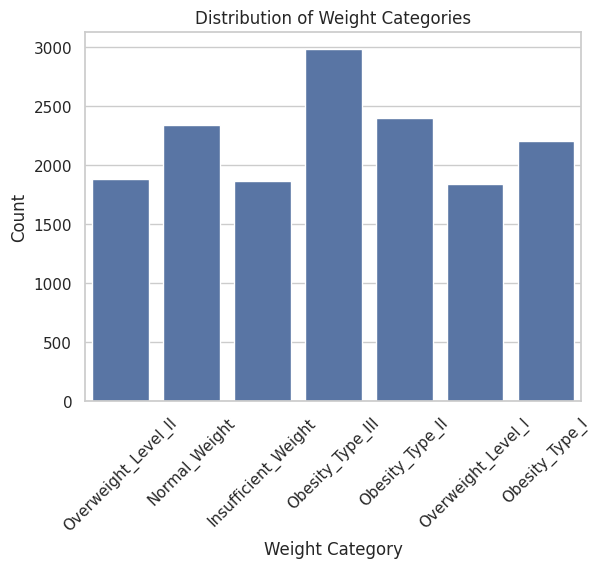

In [ ]:
# ================================
# Step 4: Explore Target Variable
# ================================

# Count of each class in target
print("Target Counts:")
print(train_df['WeightCategory'].value_counts())

# Percentage distribution
print("\nPercentage Distribution:")
print(train_df['WeightCategory'].value_counts(normalize=True)*100)

# Bar plot to visualize class distribution
sns.countplot(x='WeightCategory', data=train_df)
plt.title('Distribution of Weight Categories')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# --------------------------------
# Explanation:
# - Helps understand how samples are distributed across classes
# - Detect class imbalance, which may affect model performance
# - Bar plot provides a clear visual understanding
# --------------------------------


In [ ]:
# ================================
# Step 5: Descriptive Statistics for Numeric Features
# ================================

# Show statistics for numeric columns
train_df[numeric_cols].describe()

# --------------------------------
# Explanation:
# - Provides count, mean, std, min, max, and percentiles for numeric columns
# - Helps detect outliers, unusual values, and ranges
# - Useful for scaling, feature engineering, and understanding data spread
# --------------------------------


id           Age        Height        Weight          FCVC  \
count  15533.000000  15533.000000  15533.000000  15533.000000  15533.000000   
mean    7766.000000     23.816308      1.699918     87.785225      2.442917   
std     4484.135201      5.663167      0.087670     26.369144      0.530895   
min        0.000000     14.000000      1.450000     39.000000      1.000000   
25%     3883.000000     20.000000      1.630927     66.000000      2.000000   
50%     7766.000000     22.771612      1.700000     84.000000      2.342220   
75%    11649.000000     26.000000      1.762921    111.600553      3.000000   
max    15532.000000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  15533.000000  15533.000000  15533.000000  15533.000000  
mean       2.760425      2.027626      0.976968      0.613813  
std        0.706463      0.607733      0.836841      0.602223  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.796257      0.007050      0.000000  
50%        3.000000      2.000000      1.000000      0.566353  
75%        3.000000      2.531456      1.582675      1.000000  
max        4.000000      3.000000      3.000000      2.000000

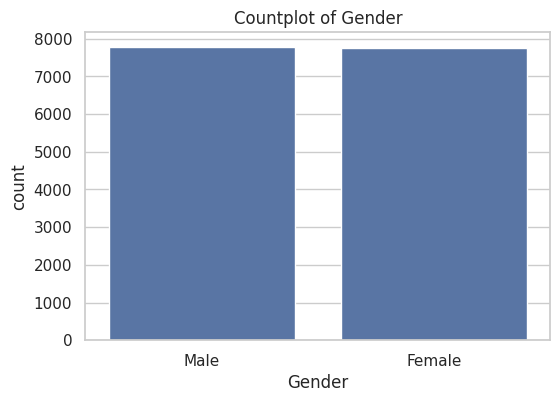

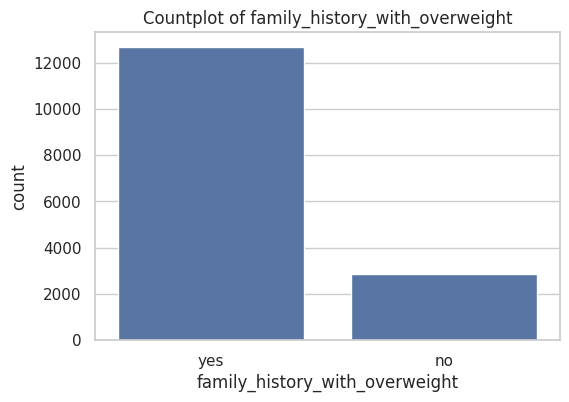

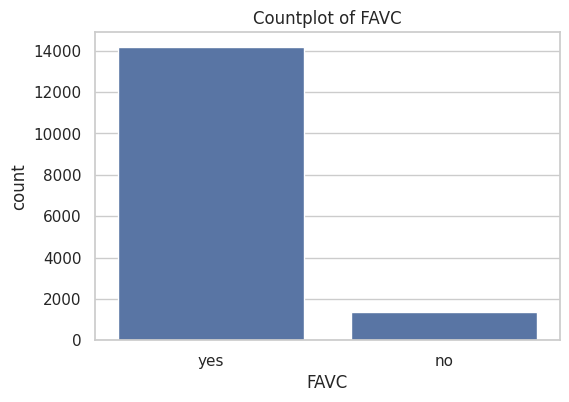

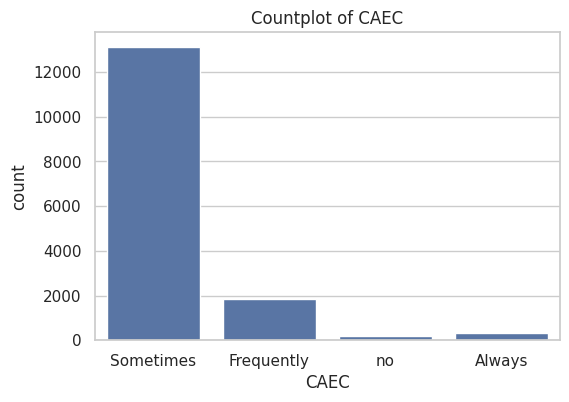

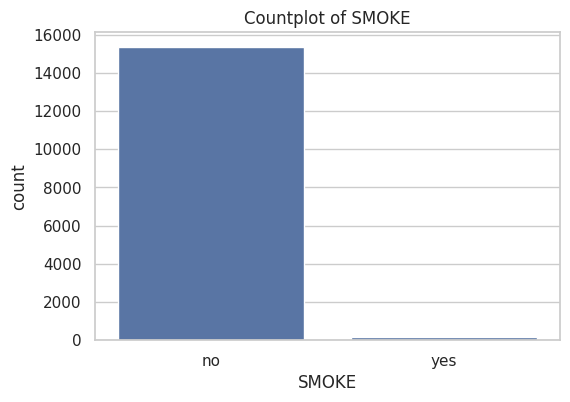

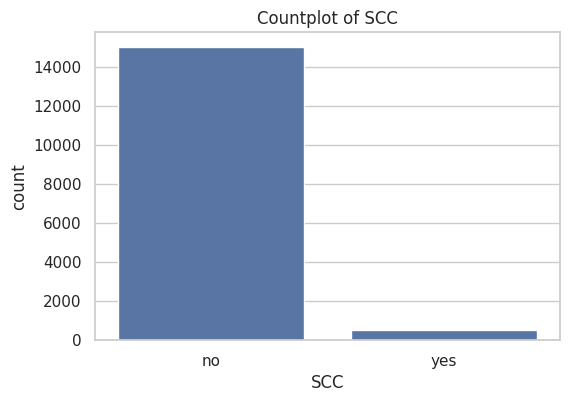

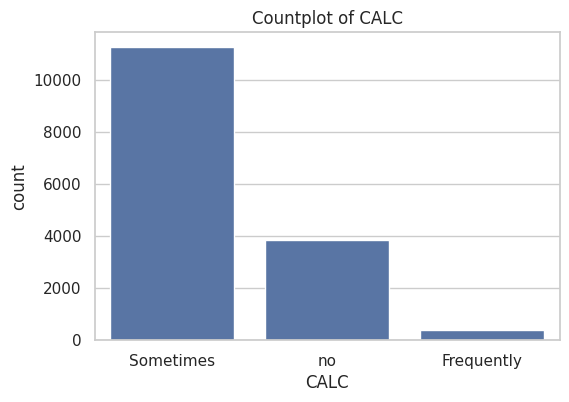

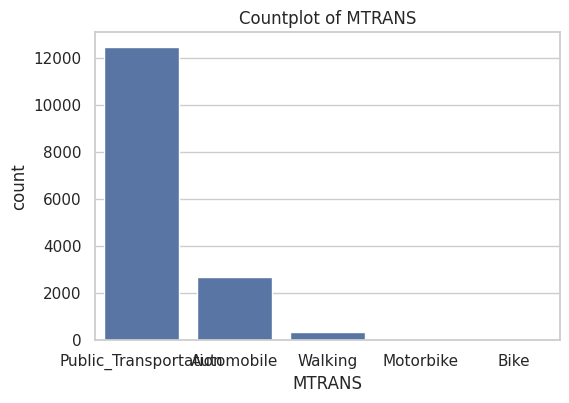

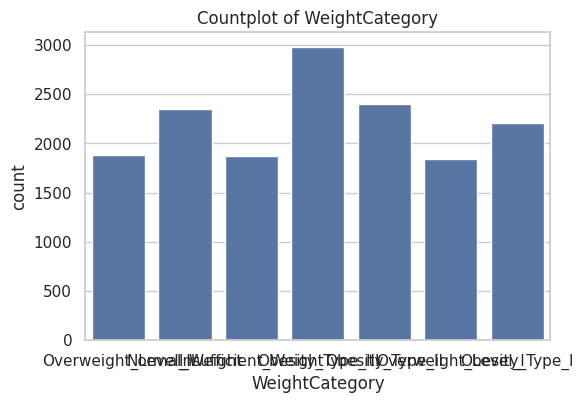

In [ ]:
# EDA - Step 6: Categorical Feature Analysis
# Subtopic: Countplot of Categorical Features

import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = train_df.select_dtypes(exclude='number').columns.tolist()

# Plot countplot for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=train_df[col])
    plt.title(f"Countplot of {col}")
    plt.show()
# Explanation:
# - sns.countplot() se har category ke examples ka count dikhta hai.
# - Visualizing categorical features helps identify imbalances or dominant categories.
# - Ye step important hai data distribution samajhne ke liye, aur future preprocessing decisions me help karega.


In [ ]:
# EDA - Step 6: Categorical Feature Analysis
# Subtopic: Percentage Distribution of Categories

# Print percentage distribution for each categorical feature
for col in categorical_cols:
    print(f"Feature: {col}")
    print(train_df[col].value_counts(normalize=True) * 100)  # percentage
    print("\n")
# Explanation:
# - value_counts(normalize=True) se har category ka percentage distribution milta hai.
# - Ye numeric form me imbalance ya dominant categories identify karne me help karta hai.
# - Isse pata chalta hai ki kaunse categories data me zyada ya kam hain, jo model training ke liye important hai.


Feature: Gender
Gender
Male      50.106225
Female    49.893775
Name: proportion, dtype: float64


Feature: family_history_with_overweight
family_history_with_overweight
yes    81.73566
no     18.26434
Name: proportion, dtype: float64


Feature: FAVC
FAVC
yes    91.315264
no      8.684736
Name: proportion, dtype: float64


Feature: CAEC
CAEC
Sometimes     84.503959
Frequently    11.961630
Always         2.227516
no             1.306895
Name: proportion, dtype: float64


Feature: SMOKE
SMOKE
no     98.860491
yes     1.139509
Name: proportion, dtype: float64


Feature: SCC
SCC
no     96.690916
yes     3.309084
Name: proportion, dtype: float64


Feature: CALC
CALC
Sometimes     72.651774
no            24.727998
Frequently     2.620228
Name: proportion, dtype: float64


Feature: MTRANS
MTRANS
Public_Transportation    80.280693
Automobile               17.182772
Walking                   2.188888
Motorbike                 0.193137
Bike                      0.154510
Name: proportion, dtype: f

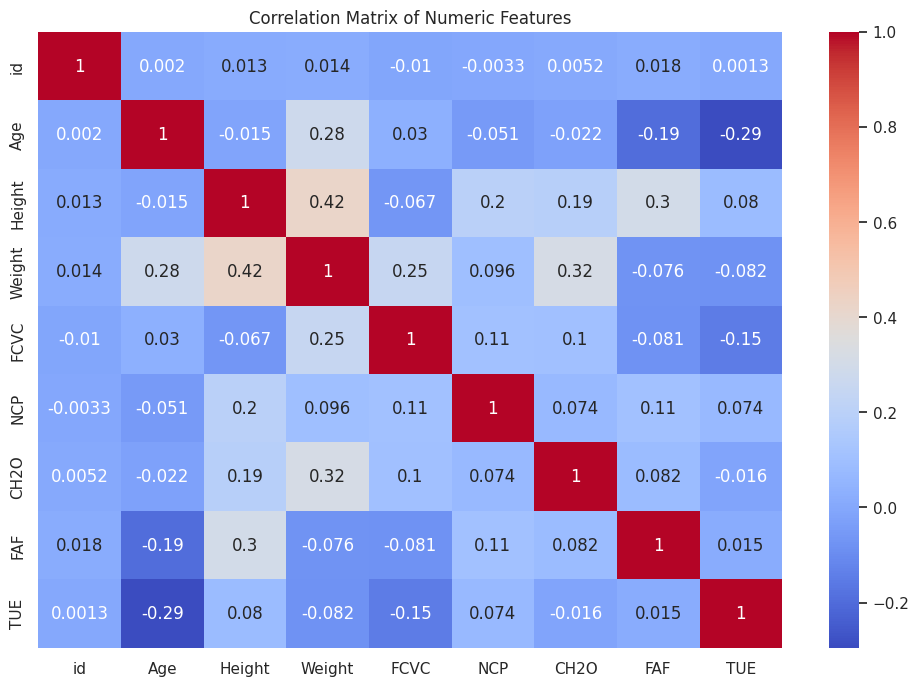

In [ ]:
# EDA - Step 7: Correlation Analysis (numeric columns only)

# Identify numeric columns
numeric_cols = train_df.select_dtypes(include='number').columns.tolist()

# Correlation matrix for numeric columns
corr_matrix = train_df[numeric_cols].corr()

# Visualize correlation matrix using heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Explanation:
# 1. select_dtypes(include='number') ensures only numeric features are selected.
# 2. corr() calculates pairwise correlation among numeric features.
# 3. Heatmap helps identify strong positive/negative correlations.
# 4. Highly correlated features may indicate redundancy or multicollinearity.


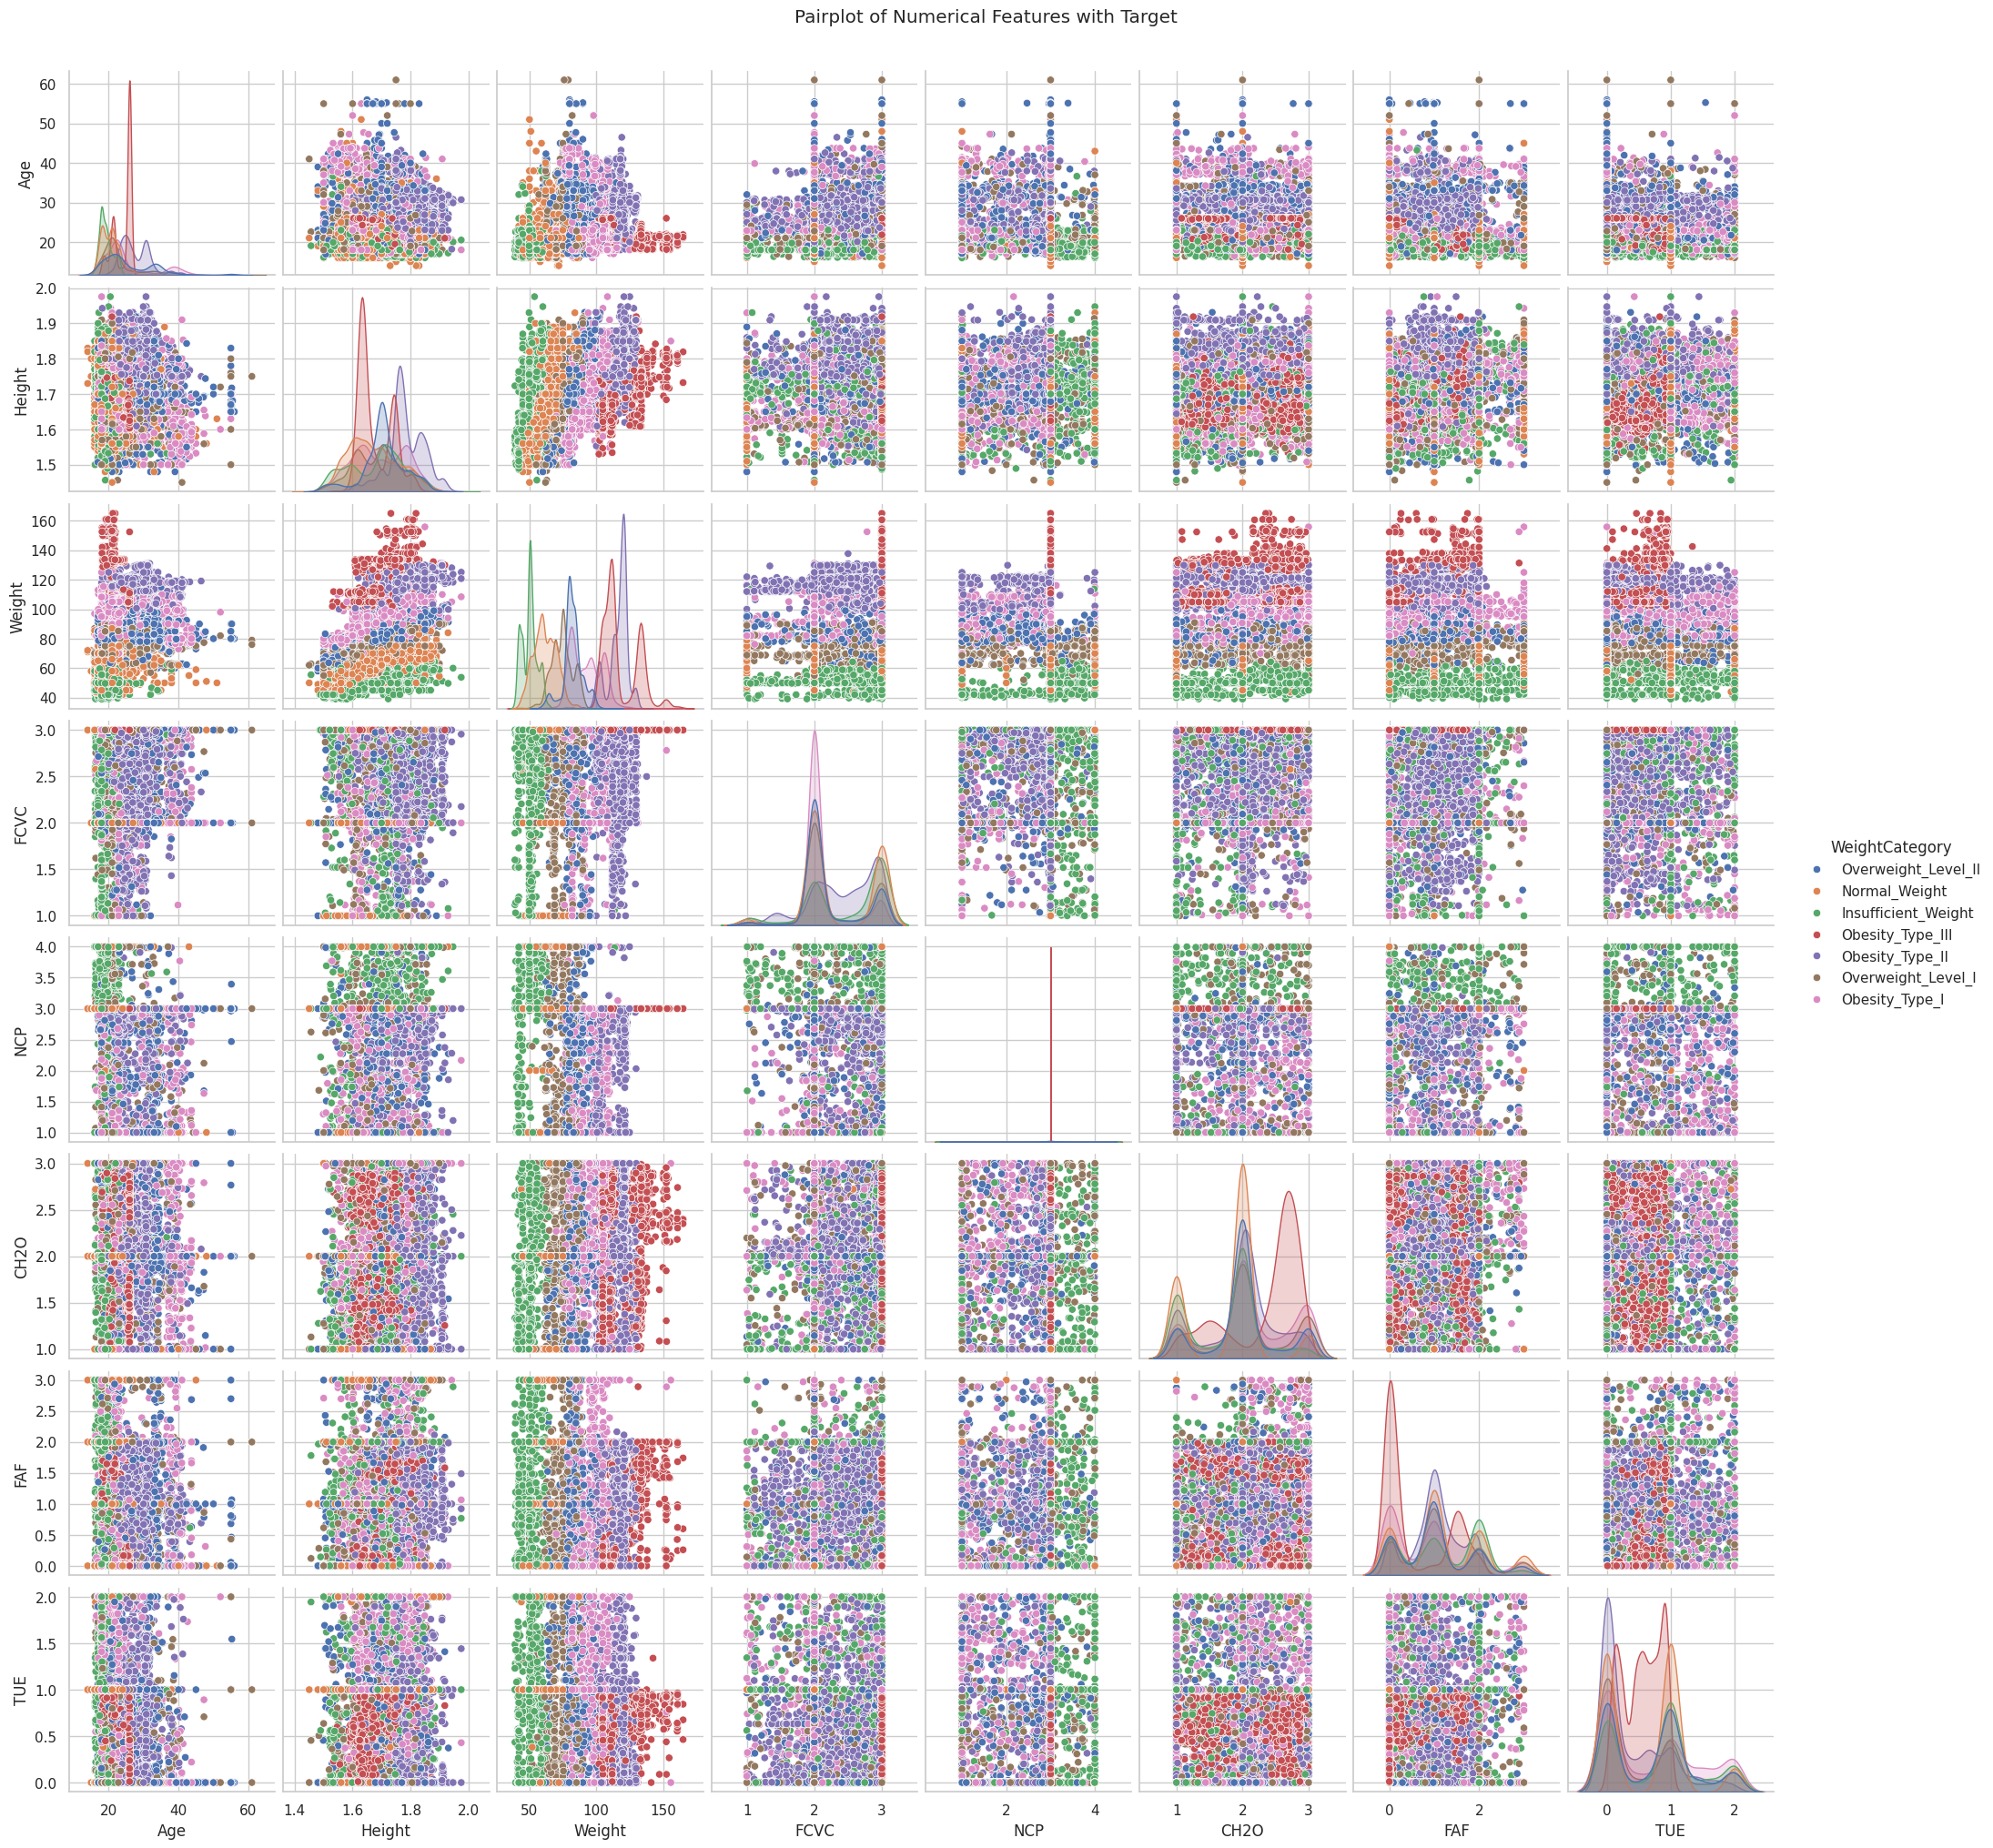

In [ ]:
# Substep 7.2: Pairplot for selected numerical features vs target
selected_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'WeightCategory']
sns.pairplot(train_df[selected_features], hue='WeightCategory', diag_kind='kde', height=2.5)
plt.suptitle("Pairplot of Numerical Features with Target", y=1.02)
plt.show()

# Explanation:
# 1. Pairplot shows scatterplots for each pair of numeric features and histogram/kde on diagonals.
# 2. hue='WeightCategory' colors the points based on target class.
# 3. Helps understand how numerical features differ across classes.
# 4. Can reveal trends, clusters, or separability among classes.


/tmp/ipython-input-1998396479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index, palette='Set2')


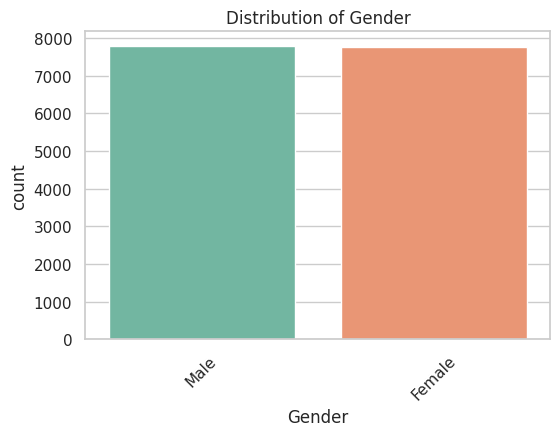

/tmp/ipython-input-1998396479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index, palette='Set2')


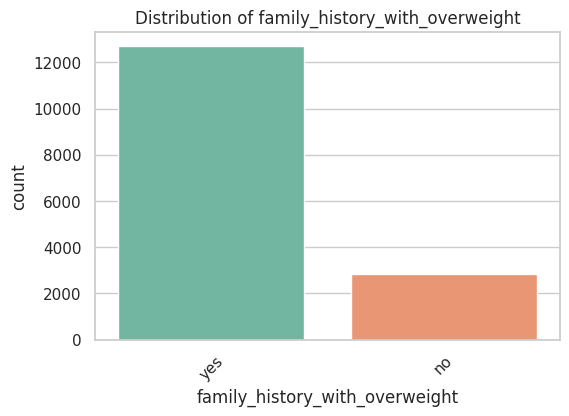

/tmp/ipython-input-1998396479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index, palette='Set2')


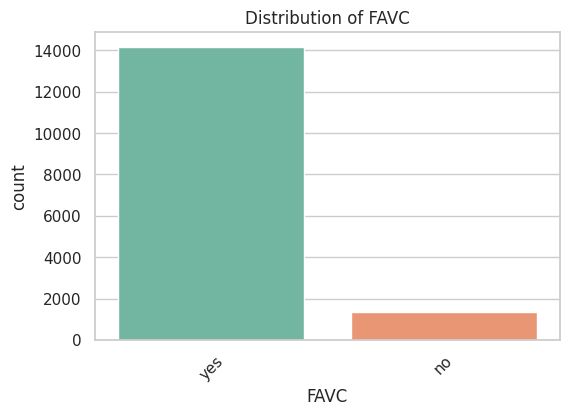

/tmp/ipython-input-1998396479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index, palette='Set2')


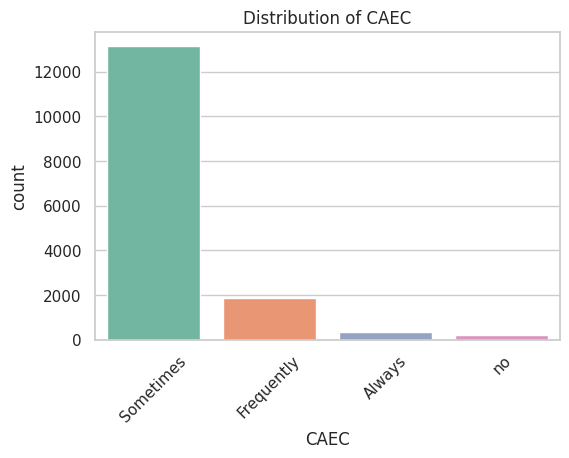

/tmp/ipython-input-1998396479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index, palette='Set2')


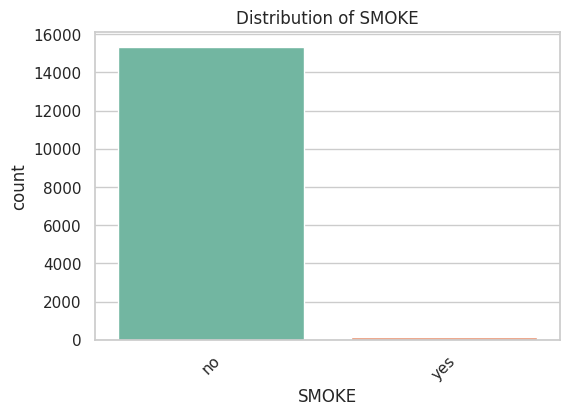

/tmp/ipython-input-1998396479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index, palette='Set2')


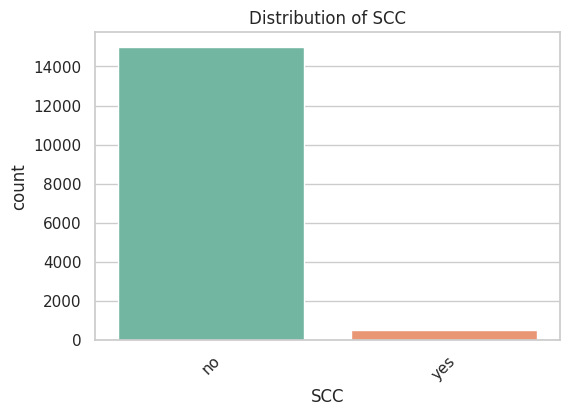

/tmp/ipython-input-1998396479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index, palette='Set2')


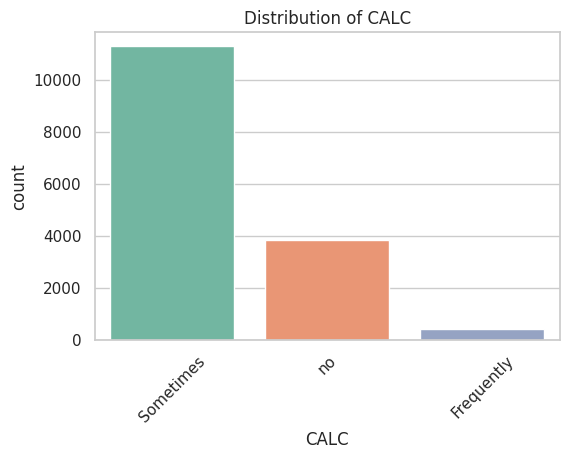

/tmp/ipython-input-1998396479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index, palette='Set2')


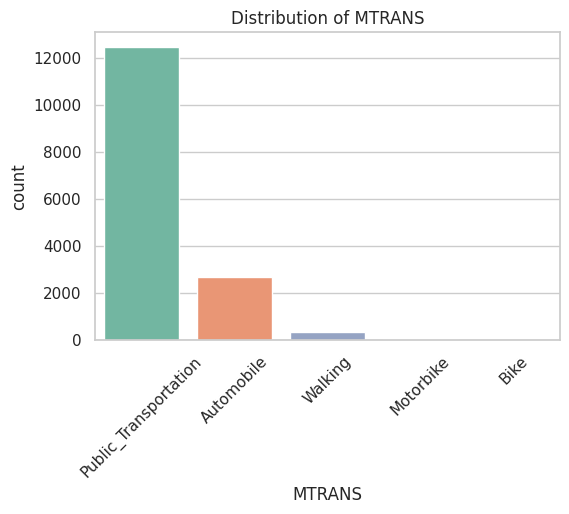

In [ ]:
# EDA: Step 8 - Categorical Feature Analysis

# Substep 8.1: Visualize distribution of categorical features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                        'SMOKE', 'SCC', 'CALC', 'MTRANS']

for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index, palette='Set2')
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()

# Explanation:
# 1. countplot shows how many samples belong to each category.
# 2. Helps understand class imbalance in categorical features.
# 3. Order parameter ensures bars are sorted by frequency.
# 4. Rotation for better readability if category names are long.


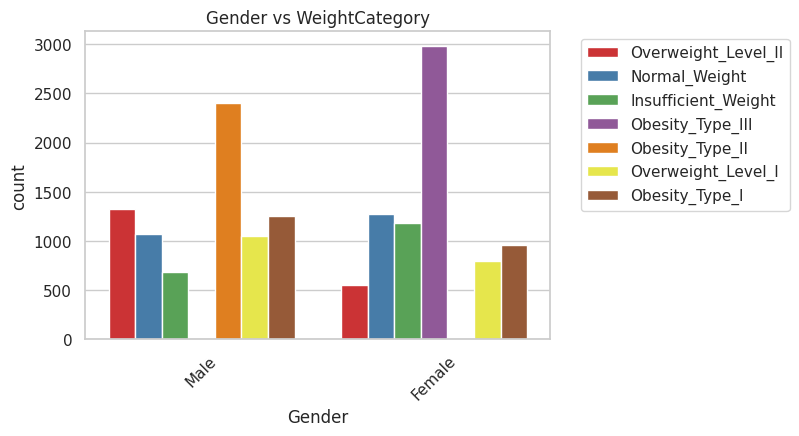

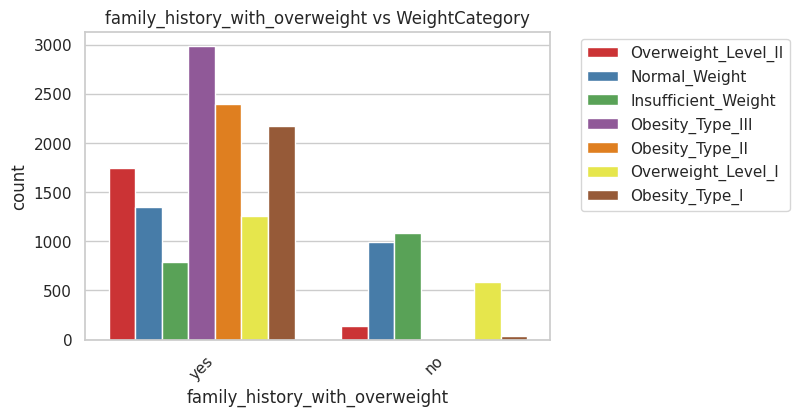

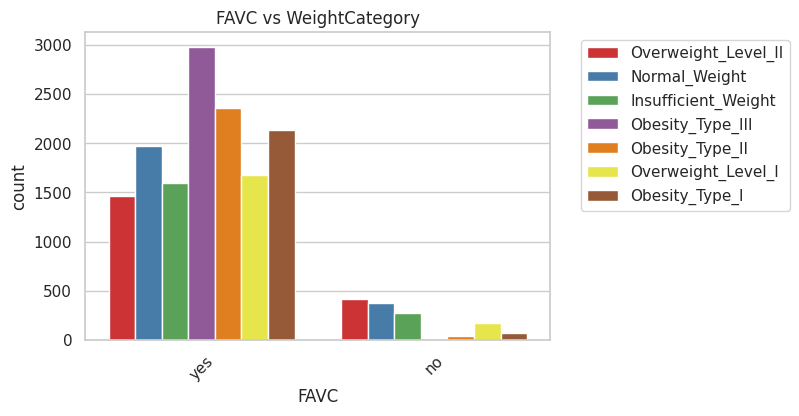

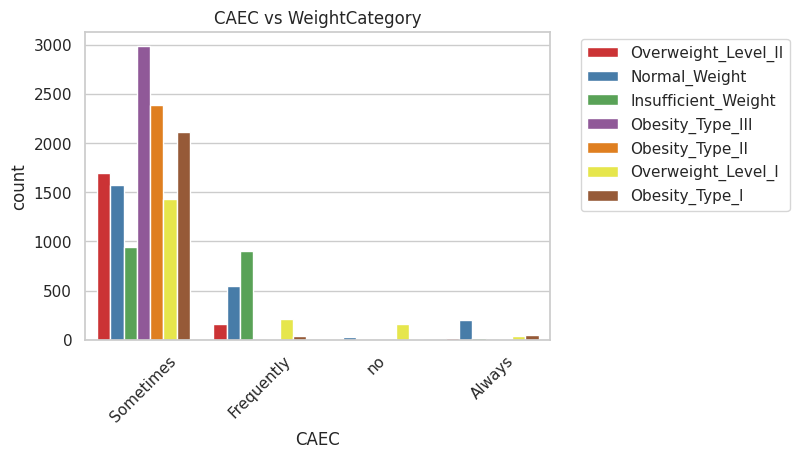

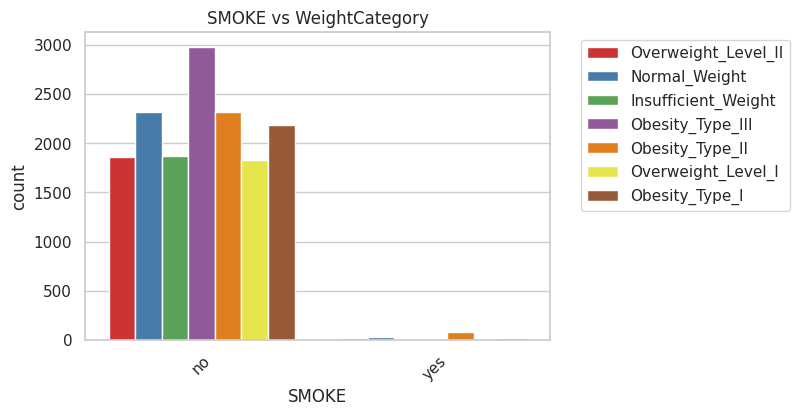

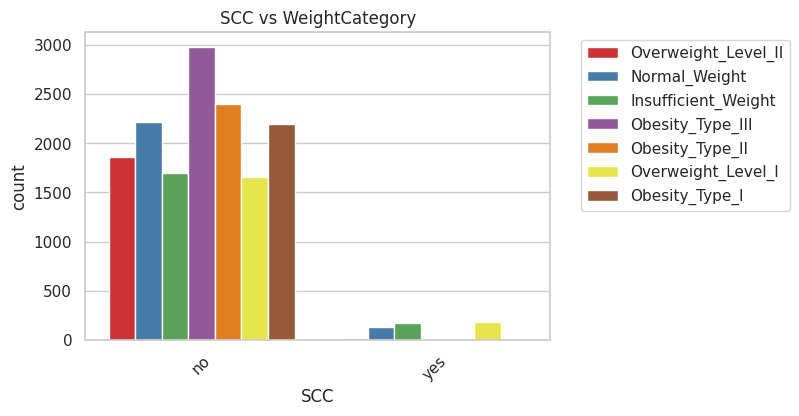

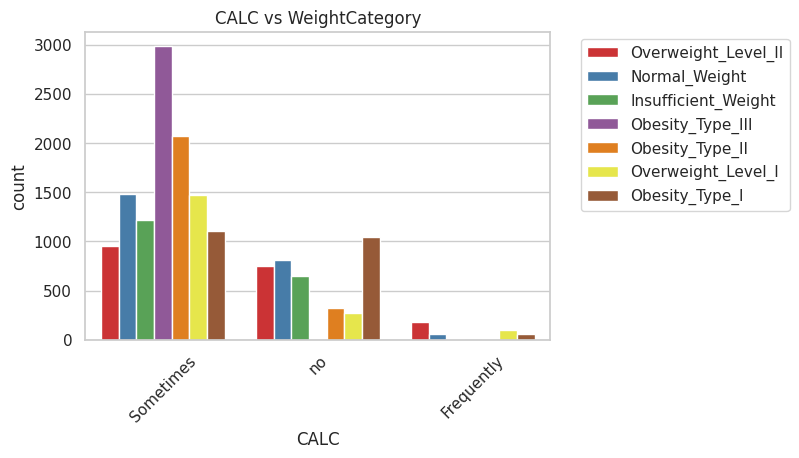

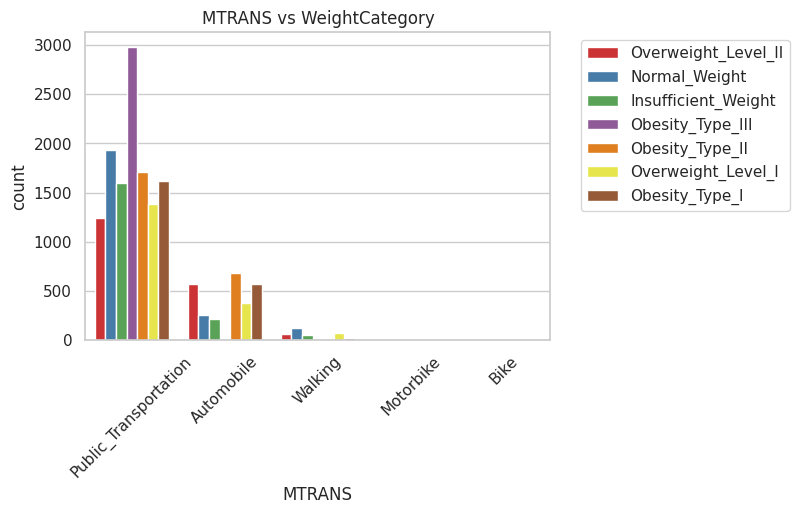

In [ ]:
# EDA: Step 9 - Categorical Features vs Target

# Substep 9.1: Visualize how target varies across categorical features
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train_df, x=feature, hue='WeightCategory', palette='Set1')
    plt.title(f"{feature} vs WeightCategory")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)  # Move legend outside
    plt.show()

# Explanation:
# 1. Countplot with hue shows how target classes are distributed within each category.
# 2. Helps identify if certain categories are more prone to specific target classes.
# 3. Useful to find strong categorical predictors.
# 4. Can guide encoding strategies later (like one-hot or label encoding).



/tmp/ipython-input-2805239996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=feature, data=train_df, palette='Set2')


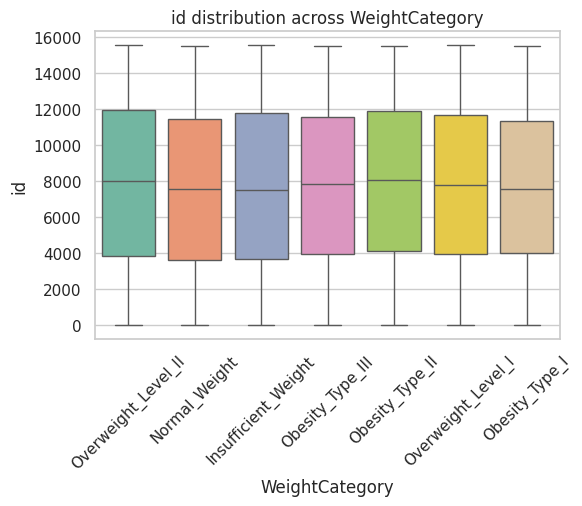

/tmp/ipython-input-2805239996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=feature, data=train_df, palette='Set2')


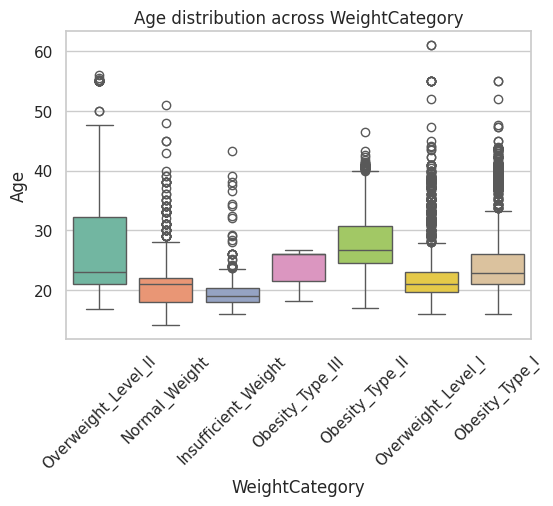

/tmp/ipython-input-2805239996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=feature, data=train_df, palette='Set2')


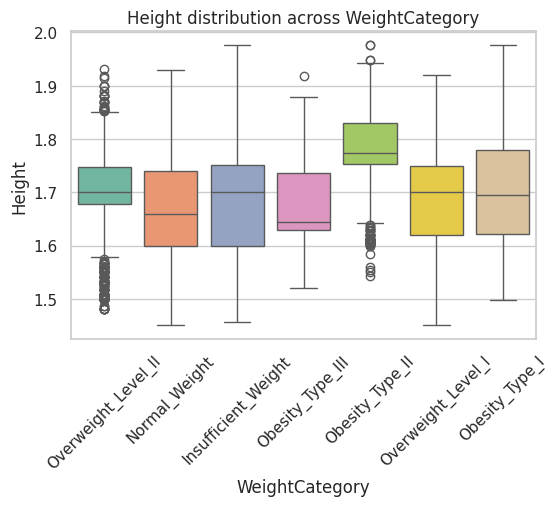

/tmp/ipython-input-2805239996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=feature, data=train_df, palette='Set2')


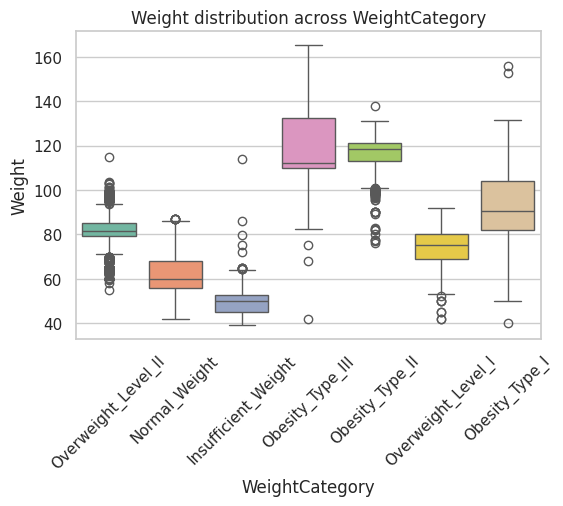

/tmp/ipython-input-2805239996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=feature, data=train_df, palette='Set2')


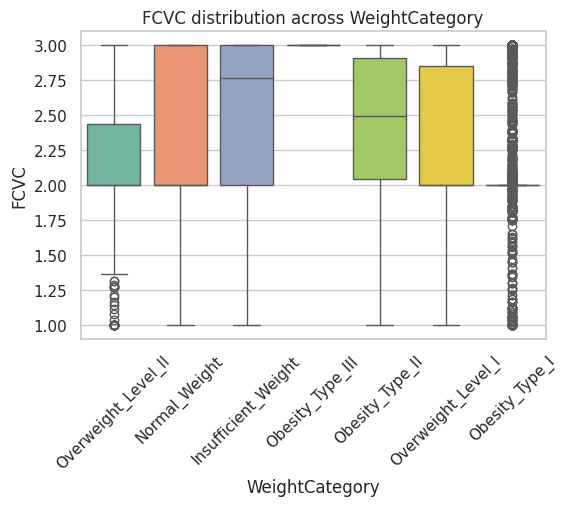

/tmp/ipython-input-2805239996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=feature, data=train_df, palette='Set2')


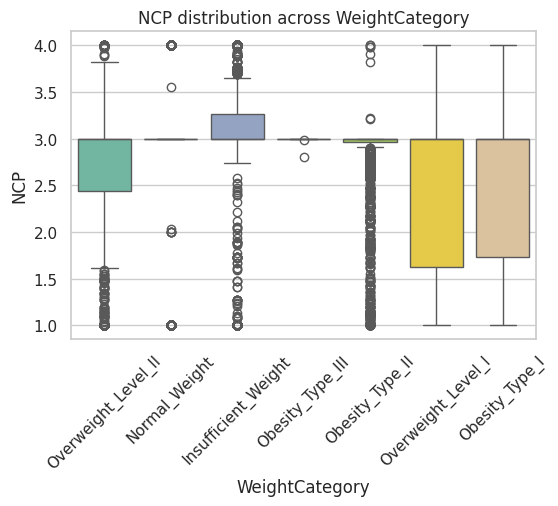

/tmp/ipython-input-2805239996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=feature, data=train_df, palette='Set2')


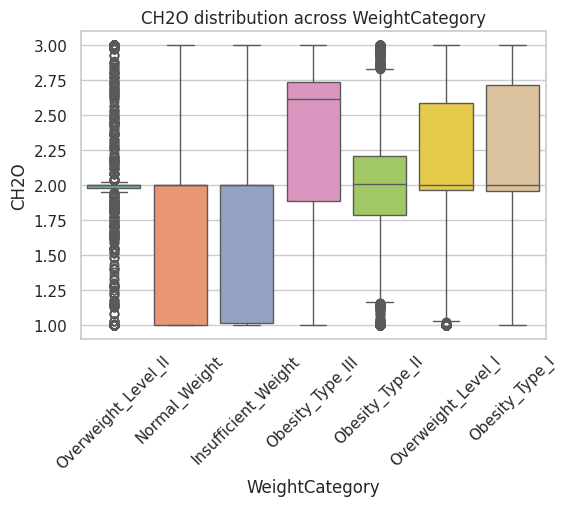

/tmp/ipython-input-2805239996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=feature, data=train_df, palette='Set2')


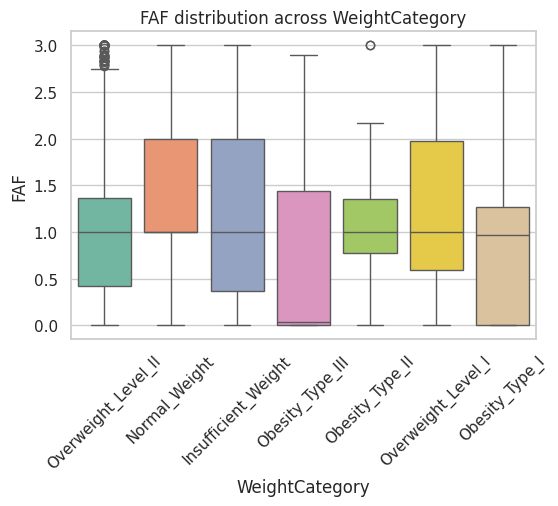

/tmp/ipython-input-2805239996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=feature, data=train_df, palette='Set2')


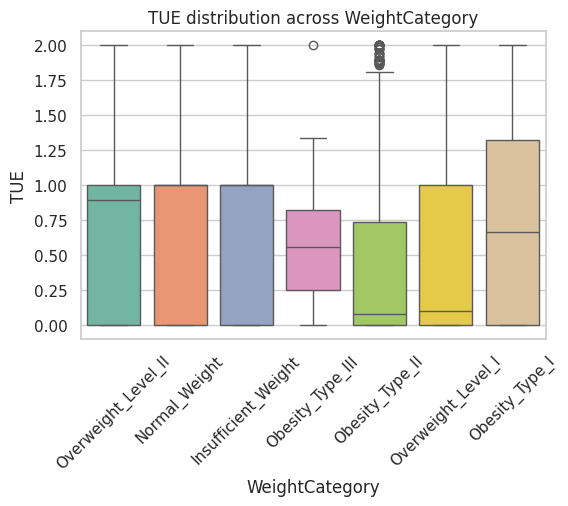

In [ ]:
# EDA: Step 10 - Numerical Features vs Target

# Substep 10.1: Boxplots for numerical features grouped by target
for feature in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='WeightCategory', y=feature, data=train_df, palette='Set2')
    plt.title(f"{feature} distribution across WeightCategory")
    plt.xticks(rotation=45)
    plt.show()

# Explanation:
# 1. Boxplot shows median, quartiles, and outliers for each numerical feature grouped by target.
# 2. Outliers appear as dots beyond whiskers.
# 3. Helps understand spread and detect extreme values.
# 4. Can guide preprocessing steps like scaling or outlier treatment.


In [ ]:
# ================================
# Preprocessing Phase - Step 0: Import Libraries
# ================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# ================================
# Step 1: Handle Missing Values
# ================================

# Numeric columns: fill missing values with median
for col in numeric_cols:
    if train_df[col].isnull().sum() > 0:
        train_df[col].fillna(train_df[col].median(), inplace=True)
        test_df[col].fillna(train_df[col].median(), inplace=True)  # Use train median to avoid leakage

# Categorical columns: fill missing values with mode
for col in categorical_cols:
    if train_df[col].isnull().sum() > 0:
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)
        test_df[col].fillna(train_df[col].mode()[0], inplace=True)

# Explanation:
# - Missing values can cause errors in models
# - Numeric → median is robust to outliers
# - Categorical → mode is the most frequent category


In [ ]:
print("Missing values in train:")
print(train_df.isnull().sum())
print("Missing values in test:")
print(test_df.isnull().sum())


Missing values in train:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
WeightCategory                    0
dtype: int64
Missing values in test:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NC

In [ ]:
# ================================
# Step 2: Handle Outliers (IQR method)
# ================================

# Numeric columns list (already defined)
print("Numeric columns before outlier handling:", numeric_cols)

for col in numeric_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap the outliers
    train_df[col] = np.where(train_df[col] < lower, lower, train_df[col])
    train_df[col] = np.where(train_df[col] > upper, upper, train_df[col])

    test_df[col] = np.where(test_df[col] < lower, lower, test_df[col])
    test_df[col] = np.where(test_df[col] > upper, upper, test_df[col])

# Print min & max after capping to check
for col in numeric_cols:
    print(f"{col}: min={train_df[col].min()}, max={train_df[col].max()}")

# Explanation:
# - Outliers can skew model learning
# - Capping prevents extreme values from affecting model
# - Tree-based models are robust, but scaling-sensitive models benefit


Numeric columns before outlier handling: ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
id: min=0.0, max=15532.0
Age: min=14.0, max=35.0
Height: min=1.45, max=1.960912
Weight: min=39.0, max=165.057269
FCVC: min=1.0, max=3.0
NCP: min=3.0, max=3.0
CH2O: min=1.0, max=3.0
FAF: min=0.0, max=3.0
TUE: min=0.0, max=2.0


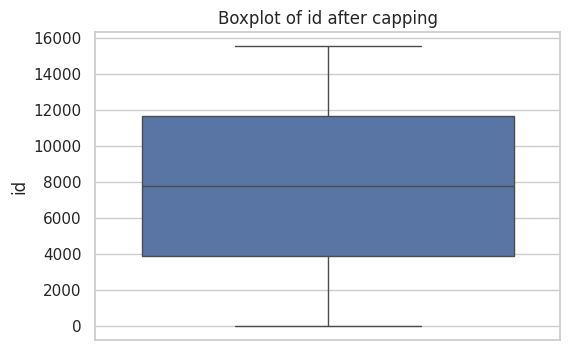

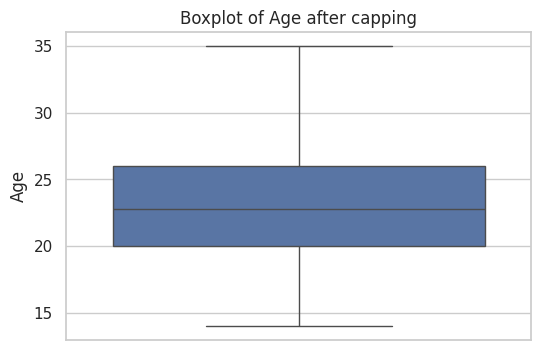

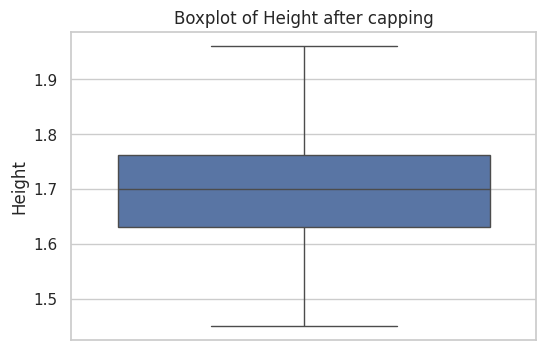

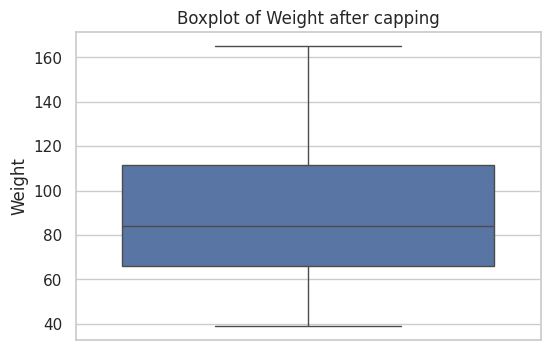

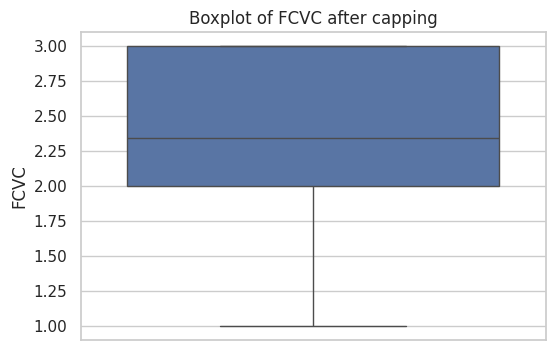

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols[:5]:  # first 5 numeric features check karte hain
    plt.figure(figsize=(6,4))
    sns.boxplot(train_df[col])
    plt.title(f"Boxplot of {col} after capping")
    plt.show()

In [ ]:
# ================================
# Step 3: Encode Categorical Variables safely
# ================================
target_col = 'WeightCategory'

# 1️⃣ Separate target from train
y_train = train_df[target_col]
train_df = train_df.drop(columns=[target_col])

# 2️⃣ Identify categorical columns in train
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# 3️⃣ One-hot encode only if column exists
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# For test_df: encode only columns that exist in test_df
categorical_cols_test = [col for col in categorical_cols if col in test_df.columns]
test_df = pd.get_dummies(test_df, columns=categorical_cols_test, drop_first=True)

# 4️⃣ Align train and test
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# 5️⃣ Reattach target to train
train_df[target_col] = y_train

# ✅ Verify
print("Columns after encoding:")
print(train_df.columns.tolist())
print("\nSample of train_df after encoding:")
print(train_df.head())


Categorical columns to encode: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Columns after encoding:
['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'WeightCategory']

Sample of train_df after encoding:
    id        Age    Height      Weight      FCVC  NCP      CH2O       FAF  \
0  0.0  24.443011  1.699998   81.669950  2.000000  3.0  2.763573  0.000000   
1  1.0  18.000000  1.560000   57.000000  2.000000  3.0  2.000000  1.000000   
2  2.0  18.000000  1.711460   50.165754  1.880534  3.0  1.910378  0.866045   
3  3.0  20.952737  1.710730  131.274851  3.000000  3.0  1.674061  1.467863   
4  4.0  31.641081  1.914186   93.798055  2.679664  3.0  1.979848  1.967973   

     

In [ ]:
# ================================
# Step 4: Feature Scaling (Standardization)
# ================================

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1️⃣ Separate features & target
target_col = 'WeightCategory'
y = train_df[target_col]
X = train_df.drop(columns=[target_col])

# 2️⃣ Identify numeric columns (excluding boolean dummies)
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns to scale:", numeric_cols)

# 3️⃣ Initialize scaler
scaler = StandardScaler()

# 4️⃣ Fit on train features and transform
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 5️⃣ Split into train & validation (stratify by y)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6️⃣ Verify
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train distribution:\n", y_train.value_counts())


Numeric columns to scale: ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X_train shape: (12426, 23)
X_val shape: (3107, 23)
y_train distribution:
 WeightCategory
Obesity_Type_III       2386
Obesity_Type_II        1922
Normal_Weight          1876
Obesity_Type_I         1766
Overweight_Level_II    1505
Insufficient_Weight    1496
Overweight_Level_I     1475
Name: count, dtype: int64


In [ ]:
# ================================
# Step 5: Train/Validation Split
# ================================

from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['WeightCategory'])  # Features only
y = train_df['WeightCategory']                 # Target

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Step 5 done: Train-Validation split completed ✅
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train distribution:\n", y_train.value_counts())

X_train shape: (12426, 23)
X_val shape: (3107, 23)
y_train distribution:
 WeightCategory
Obesity_Type_III       2386
Obesity_Type_II        1922
Normal_Weight          1876
Obesity_Type_I         1766
Overweight_Level_II    1505
Insufficient_Weight    1496
Overweight_Level_I     1475
Name: count, dtype: int64


In [ ]:
# ================================
# Check data before modeling
# ================================

# Features and target
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)

# Feature columns
print("\nFeature columns:")
print(X_train.columns.tolist())

# Target distribution
print("\ny_train distribution:")
print(y_train.value_counts())

# Sample of features
print("\nSample X_train data:")
print(X_train.head())

# Sample of target
print("\nSample y_train data:")
print(y_train.head())


X_train shape: (12426, 23)
X_val shape: (3107, 23)

Feature columns:
['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']

y_train distribution:
WeightCategory
Obesity_Type_III       2386
Obesity_Type_II        1922
Normal_Weight          1876
Obesity_Type_I         1766
Overweight_Level_II    1505
Insufficient_Weight    1496
Overweight_Level_I     1475
Name: count, dtype: int64

Sample X_train data:
            id        Age    Height     Weight      FCVC  NCP      CH2O  \
7417    7417.0  17.000000  1.700000  85.000000  3.000000  3.0  2.000000   
15351  15351.0  18.118277  1.751067  55.879263  2.000000  3.0  1.626467   
1230    1230.0  23.501249  1.598612  44.641796  2.927409  3.0  1.039313   
2344    2344.0  18.000000  

In [ ]:
# ================================
# Phase 3: Train & Validation (corrected)
# ================================

# 1️⃣ Features & Target
target_col = 'WeightCategory'
X = train_df.drop(columns=[target_col])
y = train_df[target_col]

# 2️⃣ One-hot encode categorical columns
# This step is redundant as it was already done in a previous preprocessing step.
# categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
# X = pd.get_dummies(X, columns=categorical_cols)

# 3️⃣ Train-validation split (80%-20%)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ Scale numeric columns (optional but recommended)
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

# 5️⃣ Initialize & train model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=9)
print("Step 1 done: Model initialized ✅")

dt_model.fit(X_train, y_train)
print("Step 2 done: Model trained on X_train ✅")

# 6️⃣ Predict & evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_val_pred = dt_model.predict(X_val)
print("Step 3 done: Predictions on X_val generated ✅")

val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_acc:.4f}")

print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# ================= Phase 3b: Prediction on training set (80% train) =================

# Step 3b: Generate predictions on X_train
y_train_pred = dt_model.predict(X_train)
print("Predictions on X_train (80% train data) generated ✅")

# Step 4b: Evaluate training performance
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy on 80% data: {train_acc:.4f}\n")

print("Classification Report on Training Data:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix on Training Data:\n", confusion_matrix(y_train, y_train_pred))

Step 1 done: Model initialized ✅
Step 2 done: Model trained on X_train ✅
Step 3 done: Predictions on X_val generated ✅
Validation Accuracy: 0.8661
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.87      0.93      0.90       374
      Normal_Weight       0.84      0.82      0.83       469
     Obesity_Type_I       0.83      0.83      0.83       441
    Obesity_Type_II       0.94      0.95      0.95       481
   Obesity_Type_III       0.99      0.99      0.99       597
 Overweight_Level_I       0.72      0.71      0.71       369
Overweight_Level_II       0.77      0.74      0.75       376

           accuracy                           0.87      3107
          macro avg       0.85      0.85      0.85      3107
       weighted avg       0.87      0.87      0.87      3107

Confusion Matrix:
 [[348  24   0   0   0   2   0]
 [ 47 384   0   0   0  34   4]
 [  0   0 367  26   4  13  31]
 [  0   0  20 457   0   0   4]
 [  0   0   

In [ ]:
# ================= Phase 4: Predict on Kaggle Test Set =================

print("Phase 4 started: Kaggle Test Set Prediction ✅")

# 1️⃣ Preprocess test.csv
# Drop 'id' column and create dummy variables for categorical features
X_test = pd.get_dummies(test_df.drop('id', axis=1))

# Reindex to match training columns, fill missing columns with 0
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 2️⃣ Scale numeric features using the same scaler as training
numeric_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']  # numeric columns
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Step 6 done: Test data aligned and scaled ✅")
print("Sample scaled X_test:")
print(X_test.head())

# 3️⃣ Generate predictions on test set
test_pred = dt_model.predict(X_test)
print("Step 7 done: Predictions on test set generated ✅")
print("Sample test predictions:", test_pred[:20])

# 4️⃣ Check unique classes predicted
print("Unique classes predicted in test set:", set(test_pred))

# 5️⃣ Create submission file for Kaggle
submission = pd.DataFrame({
    'id': test_df['id'],
    'WeightCategory': test_pred
})
submission.to_csv('submission.csv', index=False)
print("✅ Submission file created: submission.csv")


Phase 4 started: Kaggle Test Set Prediction ✅
Step 6 done: Test data aligned and scaled ✅
Sample scaled X_test:
   id       Age    Height    Weight      FCVC  NCP      CH2O       FAF  \
0   0 -0.932968  0.828718  1.901048  1.049847  0.0 -0.032899  0.587669   
1   0 -0.409879 -0.019780 -0.486229 -0.832346  0.0 -0.045018  0.721191   
2   0 -0.264490  0.428005 -0.220354 -0.832346  0.0 -0.324390 -0.623440   
3   0  1.495784  0.864569  1.255647  0.509181  0.0  0.193092 -0.311132   
4   0 -1.138370 -0.344349 -0.866051 -0.832346  0.0 -0.045018  0.031672   

        TUE  Gender_Male  ...  CAEC_Sometimes  CAEC_no  SMOKE_yes  SCC_yes  \
0  0.329557        False  ...            True    False      False    False   
1  2.069130        False  ...            True    False      False    False   
2 -1.014410         True  ...            True    False      False    False   
3 -0.849068         True  ...            True    False      False    False   
4  0.638209        False  ...            True    Fals

In [ ]:
# ⚙️ Phase: Preprocessing Data for Random Forest - Step 1: Add Engineered Features

# Create new feature: Body Mass Index (BMI)
train_df['BMI'] = train_df['Weight'] / (train_df['Height']**2)
test_df['BMI'] = test_df['Weight'] / (test_df['Height']**2)

# Age group binning (helps model handle nonlinearities)
train_df['AgeGroup'] = pd.cut(
    train_df['Age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['Teen', 'Young', 'Adult', 'MidAge', 'Senior']
)
test_df['AgeGroup'] = pd.cut(
    test_df['Age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['Teen', 'Young', 'Adult', 'MidAge', 'Senior']
)

# 🧾 Explanation:
# 1. BMI = Weight / (Height^2) is a derived numeric feature that indicates body fatness.
#    Tree-based models like Random Forest benefit from such informative numeric features.
# 2. AgeGroup is a categorical feature obtained by binning Age into meaningful groups.
#    Helps model handle nonlinear relationships between Age and the target WeightCategory.
# 3. Both features are added to training and test datasets, so preprocessing is consistent.


In [ ]:
train_df = train_df.drop(columns=['id'], errors='ignore')
test_df = test_df.drop(columns=['id'], errors='ignore')


In [ ]:
# ===============================
# Phase: Preprocessing Data Again for Random Forest
# ===============================

# Step 1: Identify categorical columns
# We select all columns with 'object' dtype (strings/categories)
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

# Step 2: Separate target variable before encoding
# Remove 'WeightCategory' from categorical columns so we don't one-hot encode it
target_col = 'WeightCategory'
if target_col in categorical_cols:
    categorical_cols.remove(target_col)
    # Save target values for later
    y_train = train_df[target_col]
    # Drop target from train_df temporarily
    train_df = train_df.drop(columns=[target_col])

# Step 3: One-hot encode categorical columns in train and test sets
# Drop first column to avoid dummy variable trap
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# For test_df, encode only the columns that exist in test_df
categorical_cols_test = [col for col in categorical_cols if col in test_df.columns]
test_df = pd.get_dummies(test_df, columns=categorical_cols_test, drop_first=True)

# Step 4: Align train and test DataFrames to have the same columns
# Fill missing columns with 0 in either set to ensure consistency
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# Step 5: Reattach the target column back to the training DataFrame
train_df[target_col] = y_train

# ===============================
# Explanation:
# - We first identify all categorical columns except the target.
# - One-hot encode them to convert categories into numeric features.
# - Align train and test DataFrames so they have exactly the same columns.
# - Finally, we add the target column back to train_df for modeling.
# ===============================


In [ ]:
# ===============================
# Phase: Scaling Numeric Features for Random Forest
# ===============================

# Step 1: Define numeric columns to scale
# These are continuous features that benefit from standardization
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Step 2: Initialize the StandardScaler
scaler = StandardScaler()

# Step 3: Fit the scaler on training data and transform it
# This ensures numeric features have mean=0 and std=1
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])

# Step 4: Transform the test data using the same scaler
# Important: Do NOT fit again on test data to avoid data leakage
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

# ===============================
# Explanation:
# - StandardScaler standardizes numeric features to improve model performance.
# - Fitting on training data and transforming test data ensures consistency.
# - Only numeric columns are scaled; categorical columns remain untouched.
# ===============================


In [ ]:
# ===============================
# Phase: Preprocessing and Train-Test Split for Random Forest
# ===============================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Separate features and target
X = train_df.drop(columns=['WeightCategory'])  # Features
y = train_df['WeightCategory']                 # Target variable

# Step 2: Drop mistakenly created one-hot encoded target columns if they exist
one_hot_target_cols = [col for col in X.columns if col.startswith('WeightCategory_')]
X = X.drop(columns=one_hot_target_cols, errors='ignore')

# Step 3: Handle missing values in 'AgeGroup' column (fill with mode)
if 'AgeGroup' in X.columns and X['AgeGroup'].isnull().sum() > 0:
    mode_age_group = X['AgeGroup'].mode()[0]
    X['AgeGroup'].fillna(mode_age_group, inplace=True)

# Step 4: Drop rows where the target variable is missing
data = pd.concat([X, y], axis=1).dropna(subset=['WeightCategory'])
X = data.drop(columns=['WeightCategory'])
y = data['WeightCategory']

# Step 5: Identify categorical and numeric features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numeric_features = X.select_dtypes(include=np.number).columns

# Step 6: Create preprocessing pipelines
numeric_transformer = StandardScaler()  # Scale numeric features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Encode categorical features

# Step 7: Column transformer to apply appropriate transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep other columns if any (none here)
)

# Step 8: Create a pipeline for preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Step 9: Fit and transform the features
X_processed = pipeline.fit_transform(X)

# Step 10: Split the processed data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, test_size=0.2, stratify=y, random_state=42
)

# Step 11: Verification
print("✅ Data successfully preprocessed and split into training and validation sets.")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train distribution:\n", y_train.value_counts())

# ===============================
# Explanation:
# - Numeric features are scaled to mean=0, std=1 for better model performance.
# - Categorical features (including AgeGroup) are one-hot encoded.
# - Missing values in AgeGroup are filled with mode to avoid NaNs.
# - Data is split 80% train / 20% validation, stratified by target to maintain class distribution.
# - The pipeline ensures the same preprocessing steps can be applied to test data.
# ===============================


✅ Data successfully preprocessed and split into training and validation sets.
X_train shape: (12426, 26)
X_val shape: (3107, 26)
y_train distribution:
 WeightCategory
Obesity_Type_III       2386
Obesity_Type_II        1922
Normal_Weight          1876
Obesity_Type_I         1766
Overweight_Level_II    1505
Insufficient_Weight    1496
Overweight_Level_I     1475
Name: count, dtype: int64


In [ ]:
# ===============================
# Phase: Verification of Processed Data
# ===============================

import numpy as np

# Step 1: Print the shapes of training and validation sets
print("✅ Shapes of processed data:")
print("X_train shape:", X_train.shape)  # Shape of 80% training data
print("X_val shape:", X_val.shape)      # Shape of 20% validation data

# Step 2: Check for missing values in training data
missing_count = np.isnan(X_train).sum()
print("Missing values in X_train:", missing_count)

# Note: X_train is a numpy array after preprocessing, so we cannot check for duplicate column names directly
# Duplicate column check is applicable only for pandas DataFrames
# print("Duplicate columns:", X_train.columns.duplicated().sum())

# ===============================
# Explanation:
# - Verifying shapes ensures train-test split worked correctly.
# - Checking missing values confirms all preprocessing steps handled NaNs properly.
# - Duplicate column check is skipped because numpy arrays don't have column names.
# ===============================


✅ Shapes of processed data:
X_train shape: (12426, 26)
X_val shape: (3107, 26)
Missing values in X_train: 0


In [ ]:
# ===============================
# Phase: Random Forest Model Training
# ===============================

from sklearn.ensemble import RandomForestClassifier

# Step 1: Initialize the Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=300,        # Number of trees in the forest
    max_depth=12,            # Maximum depth of each tree
    min_samples_leaf=4,      # Minimum samples required at a leaf node
    n_jobs=-1,               # Use all available CPU cores
    random_state=42          # For reproducibility
)

# Step 2: Fit the Random Forest on preprocessed training data
rf.fit(X_train, y_train)

# ===============================
# Explanation:
# - Random Forest is a tree-based ensemble method suitable for tabular data.
# - Parameters like n_estimators, max_depth, and min_samples_leaf control model complexity and prevent overfitting.
# - Fitting on X_train and y_train trains the model on 80% of the data.
# ===============================


RandomForestClassifier(max_depth=12, min_samples_leaf=4, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [ ]:
# ===============================
# Phase: Validation Set Prediction & Evaluation
# ===============================

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1️⃣: Predict on validation set
y_val_pred = rf.predict(X_val)

# Step 2️⃣: Calculate accuracy on validation set
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_acc:.4f}")

# Step 3️⃣: Print detailed classification metrics
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Step 4️⃣: Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# ===============================
# Explanation:
# - We use the trained Random Forest model to predict the labels of the 20% validation data.
# - accuracy_score gives overall prediction correctness.
# - classification_report provides precision, recall, and F1-score for each class.
# - confusion_matrix shows how predictions are distributed vs actual labels, useful for spotting misclassifications.
# ===============================


Validation Accuracy: 0.8948
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       374
      Normal_Weight       0.86      0.90      0.88       469
     Obesity_Type_I       0.88      0.85      0.86       441
    Obesity_Type_II       0.95      0.97      0.96       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.80      0.71      0.75       369
Overweight_Level_II       0.79      0.82      0.80       376

           accuracy                           0.89      3107
          macro avg       0.88      0.88      0.88      3107
       weighted avg       0.89      0.89      0.89      3107

Confusion Matrix:
 [[350  22   0   0   0   2   0]
 [ 23 424   0   0   0  19   3]
 [  0   0 373  21   4  12  31]
 [  0   0  12 466   1   0   2]
 [  0   0   1   0 596   0   0]
 [  3  43  12   0   0 263  48]
 [  0   4  28   3   0  33 308]]


In [ ]:
# ===============================
# Phase 5: Evaluate Random Forest on Training & Validation Sets
# ===============================

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------- 1️⃣ Predictions --------

# Predictions on training data (80%)
y_train_pred = rf.predict(X_train)

# Predictions on validation data (20%)
y_val_pred = rf.predict(X_val)


# -------- 2️⃣ Accuracy --------

# Training accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (80% data): {train_acc:.4f}")

# Validation accuracy
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (20% data): {val_acc:.4f}")


# -------- 3️⃣ Detailed metrics --------

print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report on Validation Data:")
print(classification_report(y_val, y_val_pred))


# -------- 4️⃣ Confusion matrices --------

print("\nConfusion Matrix - Training Data:")
print(confusion_matrix(y_train, y_train_pred))

print("\nConfusion Matrix - Validation Data:")
print(confusion_matrix(y_val, y_val_pred))


Training Accuracy (80% data): 0.9261
Validation Accuracy (20% data): 0.8948

Classification Report on Training Data:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.95      0.95      1496
      Normal_Weight       0.89      0.92      0.91      1876
     Obesity_Type_I       0.92      0.91      0.91      1766
    Obesity_Type_II       0.98      0.98      0.98      1922
   Obesity_Type_III       1.00      1.00      1.00      2386
 Overweight_Level_I       0.87      0.81      0.84      1475
Overweight_Level_II       0.84      0.87      0.85      1505

           accuracy                           0.93     12426
          macro avg       0.92      0.92      0.92     12426
       weighted avg       0.93      0.93      0.93     12426


Classification Report on Validation Data:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       374
      Normal_Weight       0.86      0.90   

Top 10 Features:
 num__BMI                                         0.345165
num__Weight                                      0.257182
num__FCVC                                        0.066459
num__Age                                         0.063845
num__Height                                      0.054730
remainder__Gender_Male                           0.052852
num__CH2O                                        0.026175
num__TUE                                         0.021548
num__FAF                                         0.018893
remainder__family_history_with_overweight_yes    0.018803
dtype: float64


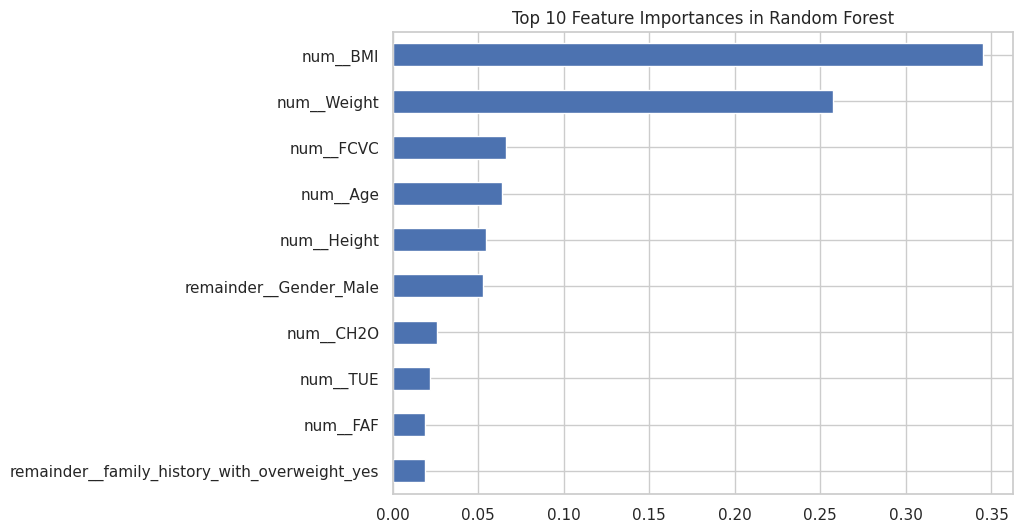

In [ ]:
# ===============================
# Phase: Feature Importance Analysis
# ===============================

import pandas as pd
import matplotlib.pyplot as plt

# Step 1️⃣: Access the preprocessing step from the pipeline
preprocessor = pipeline['preprocessor']

# Step 2️⃣: Get all feature names after preprocessing (numeric + one-hot encoded categorical)
all_feature_names = preprocessor.get_feature_names_out()

# Step 3️⃣: Get feature importances from trained Random Forest and map to feature names
importances = pd.Series(rf.feature_importances_, index=all_feature_names).sort_values(ascending=False)
print("Top 10 Features:\n", importances.head(10))

# Step 4️⃣: Plot the top 10 features
plt.figure(figsize=(8,6))
importances.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances in Random Forest")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

# ===============================
# Explanation:
# - get_feature_names_out() retrieves names of all processed features, including one-hot encoded columns.
# - RandomForestClassifier.feature_importances_ gives the relative importance of each feature.
# - Mapping importances to feature names helps identify which features contribute most to model predictions.
# - Bar plot visualizes top 10 features for easy interpretation.
# ===============================


In [ ]:
# ===============================
# Phase: Test Set Prediction & Submission
# ===============================

import pandas as pd

# Step 1️⃣: Reload original test.csv to keep 'id' column for submission
test_df_original = pd.read_csv("test.csv")

# Step 2️⃣: Extract features from test data (drop 'id' for preprocessing)
X_test_raw = test_df.drop(columns=['id'], errors='ignore')

# Step 3️⃣: Apply the same preprocessing pipeline used for training
X_test_processed = pipeline.transform(X_test_raw)

# Step 4️⃣: Predict target values using trained Random Forest
test_pred = rf.predict(X_test_processed)
print("Step done: Predictions on test set generated ✅")
print("Sample test predictions:", test_pred[:20])

# Step 5️⃣: Create submission DataFrame using original IDs
submission = pd.DataFrame({
    'id': test_df_original['id'],  # Use the original 'id' column
    'WeightCategory': test_pred
})

# Step 6️⃣: Save submission CSV
submission.to_csv('submission_rf.csv', index=False)
print("✅ Submission file created: submission_rf.csv")

# Step 7️⃣: Download submission file (if running in Google Colab)
from google.colab import files
files.download('submission_rf.csv')

# ===============================
# Explanation:
# - We reload test.csv to retain 'id' because we dropped it during preprocessing.
# - pipeline.transform() ensures test features undergo the exact preprocessing as training data.
# - rf.predict() generates predictions on processed test data.
# - Submission CSV maps predicted WeightCategory to original 'id' for Kaggle submission.
# - files.download() allows direct download in Google Colab.
# ===============================


Step done: Predictions on test set generated ✅
Sample test predictions: ['Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_II' 'Normal_Weight' 'Insufficient_Weight' 'Obesity_Type_I'
 'Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_I'
 'Overweight_Level_II' 'Obesity_Type_I' 'Obesity_Type_III'
 'Obesity_Type_II' 'Normal_Weight' 'Obesity_Type_III' 'Normal_Weight'
 'Obesity_Type_III' 'Insufficient_Weight' 'Obesity_Type_III']
✅ Submission file created: submission_rf.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Step 1: Model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Step 2: Param distributions (limited but effective range)
param_dist = {
    'n_estimators': randint(100, 250),     # fewer estimators
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Step 3: Randomized Search (less iterations for speed)
rf_random = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=15,            # reduced from 50+ to 15 for faster search
    cv=3,                 # 3-fold CV is fast enough
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

# Step 4: Fit
rf_random.fit(X_train, y_train)

# Step 5: Results
print("Best Hyperparameters:", rf_random.best_params_)
print("Best CV Accuracy:", rf_random.best_score_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 221}
Best CV Accuracy: 0.8940125543215838


In [ ]:
y_test = y_val
X_test = X_val


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier if not already imported

# Assuming 'rf_random' is available from the previous cell (newU_6djAiGv)

# Get the best model from RandomizedSearchCV
best_rf = rf_random.best_estimator_

y_pred = best_rf.predict(X_test)

# Assuming y_test and X_test are defined from a previous splitting/preprocessing step.
# If not, these variables would also cause NameErrors.

print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Test Accuracy: 0.8979723205664628

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94       374
      Normal_Weight       0.87      0.90      0.89       469
     Obesity_Type_I       0.88      0.85      0.87       441
    Obesity_Type_II       0.95      0.97      0.96       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.79      0.73      0.76       369
Overweight_Level_II       0.79      0.81      0.80       376

           accuracy                           0.90      3107
          macro avg       0.89      0.89      0.89      3107
       weighted avg       0.90      0.90      0.90      3107


Confusion Matrix:
 [[353  19   0   0   0   2   0]
 [ 24 423   0   0   0  19   3]
 [  0   0 376  20   4  12  29]
 [  0   0  10 468   1   0   2]
 [  0   0   1   0 596   0   0]
 [  3  40  12   0   0 269  45]
 [  0   3  27   3   0  38 305]]


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# STEP 1 — Convert to DataFrames (so feature names align)
# Only do this if X_train/X_test are numpy arrays
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# STEP 2 — Align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# STEP 3 — Train the final model with best hyperparameters
best_rf = RandomForestClassifier(
    max_depth=20,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=8,
    n_estimators=206,
    random_state=42
)

best_rf.fit(X_train, y_train)

# STEP 4 — Predict and evaluate
y_pred = best_rf.predict(X_test)

print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Test Accuracy: 0.8982941744448021

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       374
      Normal_Weight       0.87      0.90      0.88       469
     Obesity_Type_I       0.89      0.85      0.87       441
    Obesity_Type_II       0.96      0.98      0.97       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.80      0.71      0.75       369
Overweight_Level_II       0.79      0.83      0.81       376

           accuracy                           0.90      3107
          macro avg       0.89      0.89      0.89      3107
       weighted avg       0.90      0.90      0.90      3107


Confusion Matrix:
 [[352  20   0   0   0   2   0]
 [ 25 421   0   0   0  20   3]
 [  0   0 376  19   4  13  29]
 [  0   0   8 470   1   0   2]
 [  0   0   0   0 596   1   0]
 [  3  41  12   0   0 263  50]
 [  0   4  27   3   0  29 313]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit on training labels and transform both train & test
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [ ]:
!pip install -U xgboost




In [ ]:
import xgboost as xgb
print(xgb.__version__)


3.1.0


In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------------------------
# 1️⃣ Label encode target
# ---------------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)

# ---------------------------
# 2️⃣ Convert NumPy arrays to DMatrix
# ---------------------------
# Use safe feature names (f0, f1, f2, ...)
dtrain = xgb.DMatrix(X_train, label=y_train_enc, feature_names=[f"f{i}" for i in range(X_train.shape[1])])
dval   = xgb.DMatrix(X_val, label=y_val_enc, feature_names=[f"f{i}" for i in range(X_val.shape[1])])

# ---------------------------
# 3️⃣ Set XGBoost parameters
# ---------------------------
params = {
    "objective": "multi:softprob",
    "num_class": len(le.classes_),
    "max_depth": 5,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "eval_metric": "mlogloss",
    "seed": 42
}

# ---------------------------
# 4️⃣ Train with early stopping
# ---------------------------
evals = [(dtrain, 'train'), (dval, 'val')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=10
)

# ---------------------------
# 5️⃣ Predict & evaluate
# ---------------------------
y_train_pred = bst.predict(dtrain)
y_val_pred   = bst.predict(dval)

# Since output is probabilities, take argmax
y_train_pred_labels = y_train_pred.argmax(axis=1)
y_val_pred_labels   = y_val_pred.argmax(axis=1)

print(f"Train Accuracy: {accuracy_score(y_train_enc, y_train_pred_labels):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val_enc, y_val_pred_labels):.4f}")

print("\nClassification Report on Validation Set:")
print(classification_report(y_val_enc, y_val_pred_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val_enc, y_val_pred_labels))


[0]	train-mlogloss:1.82672	val-mlogloss:1.82820
[10]	train-mlogloss:1.11588	val-mlogloss:1.13051
[20]	train-mlogloss:0.78927	val-mlogloss:0.81134
[30]	train-mlogloss:0.59652	val-mlogloss:0.62460
[40]	train-mlogloss:0.47936	val-mlogloss:0.51294
[50]	train-mlogloss:0.40503	val-mlogloss:0.44254
[60]	train-mlogloss:0.35510	val-mlogloss:0.39638
[70]	train-mlogloss:0.32018	val-mlogloss:0.36624
[80]	train-mlogloss:0.29491	val-mlogloss:0.34510
[90]	train-mlogloss:0.27584	val-mlogloss:0.33083
[100]	train-mlogloss:0.26082	val-mlogloss:0.31965
[110]	train-mlogloss:0.24862	val-mlogloss:0.31151
[120]	train-mlogloss:0.23890	val-mlogloss:0.30541
[130]	train-mlogloss:0.23050	val-mlogloss:0.30079
[140]	train-mlogloss:0.22252	val-mlogloss:0.29748
[150]	train-mlogloss:0.21524	val-mlogloss:0.29433
[160]	train-mlogloss:0.20797	val-mlogloss:0.29178
[170]	train-mlogloss:0.20175	val-mlogloss:0.28950
[180]	train-mlogloss:0.19561	val-mlogloss:0.28727
[190]	train-mlogloss:0.19009	val-mlogloss:0.28572
[200]	train

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------------------------
# 1️⃣ Label encode target
# ---------------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)

# ---------------------------
# 2️⃣ Convert NumPy arrays to DMatrix with safe feature names
# ---------------------------
dtrain = xgb.DMatrix(X_train, label=y_train_enc, feature_names=[f"f{i}" for i in range(X_train.shape[1])])
dval   = xgb.DMatrix(X_val, label=y_val_enc, feature_names=[f"f{i}" for i in range(X_val.shape[1])])

# ---------------------------
# 3️⃣ Set tuned XGBoost parameters
# ---------------------------
params = {
    "objective": "multi:softprob",
    "num_class": len(le.classes_),
    "max_depth": 6,
    "learning_rate": 0.03,
    "subsample": 0.85,
    "colsample_bytree": 0.85,
    "gamma": 0.1,
    "min_child_weight": 2,
    "eval_metric": "mlogloss",
    "seed": 42
}

# ---------------------------
# 4️⃣ Train with early stopping
# ---------------------------
evals = [(dtrain, 'train'), (dval, 'val')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=800,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=10
)

# ---------------------------
# 5️⃣ Predict & evaluate
# ---------------------------
y_train_pred = bst.predict(dtrain)
y_val_pred   = bst.predict(dval)

y_train_pred_labels = y_train_pred.argmax(axis=1)
y_val_pred_labels   = y_val_pred.argmax(axis=1)

print(f"Train Accuracy: {accuracy_score(y_train_enc, y_train_pred_labels):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val_enc, y_val_pred_labels):.4f}")

print("\nClassification Report on Validation Set:")
print(classification_report(y_val_enc, y_val_pred_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val_enc, y_val_pred_labels))


[0]	train-mlogloss:1.86650	val-mlogloss:1.86779
[10]	train-mlogloss:1.33628	val-mlogloss:1.34943
[20]	train-mlogloss:1.02696	val-mlogloss:1.04914
[30]	train-mlogloss:0.82203	val-mlogloss:0.85135
[40]	train-mlogloss:0.67711	val-mlogloss:0.71225
[50]	train-mlogloss:0.57269	val-mlogloss:0.61304
[60]	train-mlogloss:0.49475	val-mlogloss:0.53900
[70]	train-mlogloss:0.43600	val-mlogloss:0.48449
[80]	train-mlogloss:0.39053	val-mlogloss:0.44285
[90]	train-mlogloss:0.35481	val-mlogloss:0.41083
[100]	train-mlogloss:0.32669	val-mlogloss:0.38621
[110]	train-mlogloss:0.30393	val-mlogloss:0.36651
[120]	train-mlogloss:0.28538	val-mlogloss:0.35124
[130]	train-mlogloss:0.27033	val-mlogloss:0.33932
[140]	train-mlogloss:0.25767	val-mlogloss:0.32967
[150]	train-mlogloss:0.24691	val-mlogloss:0.32226
[160]	train-mlogloss:0.23752	val-mlogloss:0.31614
[170]	train-mlogloss:0.22943	val-mlogloss:0.31083
[180]	train-mlogloss:0.22233	val-mlogloss:0.30634
[190]	train-mlogloss:0.21577	val-mlogloss:0.30278
[200]	train

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, DMatrix, train
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import files


# --- Data Loading ---
# Assuming the file name is 'train.csv'
# You might need to upload the file if running this cell directly after a fresh environment.
train_df = None # Initialize train_df to None
try:
  train_df = pd.read_csv("train.csv")
except FileNotFoundError:
  print("train.csv not found. Please upload the file.")
  # You might want to add file upload logic here if needed for a completely standalone cell


# Proceed with preprocessing and tuning only if train_df was loaded successfully
if train_df is not None:
    # --- Engineered Features ---
    # Add engineered features: BMI and AgeGroup
    train_df['BMI'] = train_df['Weight'] / (train_df['Height']**2)
    train_df['AgeGroup'] = pd.cut(
        train_df['Age'],
        bins=[0, 18, 30, 45, 60, 100],
        labels=['Teen', 'Young', 'Adult', 'MidAge', 'Senior']
    )


    # --- Data Preprocessing and Splitting (copied and adapted from newU_6djAiGv and 5UVnMy0ewT7I) ---
    # Separate features and target
    X = train_df.drop(columns=['WeightCategory'])
    y = train_df['WeightCategory']

    # Drop the one-hot encoded target columns if they exist
    one_hot_target_cols = [col for col in X.columns if col.startswith('WeightCategory_')]
    X = X.drop(columns=one_hot_target_cols, errors='ignore')


    # Handle missing values in AgeGroup (fill with mode)
    if 'AgeGroup' in X.columns and X['AgeGroup'].isnull().sum() > 0:
        mode_age_group = X['AgeGroup'].mode()[0]
        X['AgeGroup'].fillna(mode_age_group, inplace=True)

    # Drop rows where the target variable is missing
    data = pd.concat([X, y], axis=1).dropna(subset=['WeightCategory'])
    X = data.drop(columns=['WeightCategory'])
    y = data['WeightCategory']

    # Identify categorical columns (including the new 'AgeGroup')
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    # Identify numeric columns
    numeric_features = X.select_dtypes(include=np.number).columns

    # Create preprocessing pipelines for numeric and categorical features
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

    # Create a pipeline with preprocessing
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Apply preprocessing to the data
    X_processed = pipeline.fit_transform(X)

    # Split the processed data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_processed, y, test_size=0.2, stratify=y, random_state=42
    )
    # --- End of Data Preprocessing and Splitting ---


    # 1️⃣ Encode target variable
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_val_encoded = le.transform(y_val) # Use y_val for validation

    print("Step 1 done: Target variable encoded ✅")

    # 2️⃣ Convert NumPy arrays to DMatrix
    # Explicitly define feature names for robustness
    feature_names = [f"f{i}" for i in range(X_train.shape[1])]

    dtrain = DMatrix(X_train, label=y_train_encoded, feature_names=feature_names)
    dval = DMatrix(X_val, label=y_val_encoded, feature_names=feature_names) # Use X_val for validation

    print("Step 2 done: Data converted to DMatrix ✅")

    # 3️⃣ Set XGBoost parameters (using parameters that worked well in YdIVJBzObhSc)
    params = {
        "objective": "multi:softprob",
        "num_class": len(le.classes_),
        "max_depth": 6,
        "learning_rate": 0.03,
        "subsample": 0.85,
        "colsample_bytree": 0.85,
        "gamma": 0.1,
        "min_child_weight": 2,
        "eval_metric": "mlogloss",
        "seed": 42
    }

    print("Step 3 done: XGBoost parameters set ✅")

    # 4️⃣ Train with early stopping using xgb.train
    evals = [(dtrain, 'train'), (dval, 'val')]
    bst = train(
        params,
        dtrain,
        num_boost_round=800, # Number of boosting rounds
        evals=evals,
        early_stopping_rounds=20, # Stop if validation metric doesn't improve for 20 rounds
        verbose_eval=10 # Print evaluation results every 10 rounds
    )

    print("Step 4 done: XGBoost Model trained with early stopping ✅")

    # 5️⃣ Predict & evaluate on validation set (X_val)
    # Predict probabilities first
    y_val_pred_proba = bst.predict(dval)

    # Get predicted class labels by taking argmax
    y_val_pred_encoded = y_val_pred_proba.argmax(axis=1)

    # Decode predictions back to original labels for evaluation
    y_val_pred = le.inverse_transform(y_val_pred_encoded)

    print("Step 5 done: Predictions on X_val generated ✅")

    val_acc_xgb = accuracy_score(y_val, y_val_pred)
    print(f"XGBoost Validation Accuracy: {val_acc_xgb:.4f}")

    print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))
    print("\nConfusion Matrix (Validation):\n", confusion_matrix(y_val, y_val_pred))


    # Note: Test set prediction for Kaggle submission would be a separate step.
    # This cell focuses on training and evaluating on the validation set.

else:
    print("train_df not loaded. Skipping XGBoost training and evaluation.")

Step 1 done: Target variable encoded ✅
Step 2 done: Data converted to DMatrix ✅
Step 3 done: XGBoost parameters set ✅
[0]	train-mlogloss:1.86230	val-mlogloss:1.86370
[10]	train-mlogloss:1.32665	val-mlogloss:1.34117
[20]	train-mlogloss:1.01909	val-mlogloss:1.04261
[30]	train-mlogloss:0.81552	val-mlogloss:0.84616
[40]	train-mlogloss:0.67169	val-mlogloss:0.70838
[50]	train-mlogloss:0.56680	val-mlogloss:0.60900
[60]	train-mlogloss:0.48890	val-mlogloss:0.53598
[70]	train-mlogloss:0.43030	val-mlogloss:0.48179
[80]	train-mlogloss:0.38492	val-mlogloss:0.44034
[90]	train-mlogloss:0.34893	val-mlogloss:0.40895
[100]	train-mlogloss:0.32053	val-mlogloss:0.38470
[110]	train-mlogloss:0.29778	val-mlogloss:0.36547
[120]	train-mlogloss:0.27903	val-mlogloss:0.35042
[130]	train-mlogloss:0.26365	val-mlogloss:0.33832
[140]	train-mlogloss:0.25075	val-mlogloss:0.32884
[150]	train-mlogloss:0.23975	val-mlogloss:0.32105
[160]	train-mlogloss:0.23029	val-mlogloss:0.31523
[170]	train-mlogloss:0.22180	val-mlogloss:0

In [ ]:
# ==================================================
# FINAL XGBOOST PERFORMANCE SUMMARY CODE
# ==================================================
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Optimal parameters from the final fine-tuning:
params = {
    'subsample': 0.6,
    'n_estimators': 500,
    'min_child_weight': 1,
    'max_depth': 3,
    'learning_rate': 0.05,
    'gamma': 0.1,
    'colsample_bytree': 1.0
}

# 1. Initialize the Best Model
xgb_final_best_model = XGBClassifier(
    objective='multi:softprob',
    random_state=42,
    n_jobs=4,
    use_label_encoder=False,
    eval_metric='mlogloss',
    **params
)

# Encode target variable
# Assuming the LabelEncoder 'le' is already fitted from the previous XGBoost cell.
le = LabelEncoder() # Re-initialize and fit if needed, but assuming it's available from previous cell
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
print("Target variable encoded ✅")


# 2. Train the model
print("Training the final best XGBoost Model...")
# X_train and y_train should include engineered features (BMI, Lifestyle_Score)
xgb_final_best_model.fit(X_train, y_train_encoded)

# 3. Calculate Training Accuracy (on 80% data)
y_train_pred_encoded = xgb_final_best_model.predict(X_train)
y_train_pred = le.inverse_transform(y_train_pred_encoded)
train_acc = accuracy_score(y_train, y_train_pred)

# 4. Calculate Validation Accuracy
y_val_pred_encoded = xgb_final_best_model.predict(X_val)
y_val_pred = le.inverse_transform(y_val_pred_encoded)
val_acc = accuracy_score(y_val, y_val_pred)

# 5. Calculate Cross-Validation (CV) Score (on X_train)
# Use 5-fold CV for a robust estimate
print("Calculating 5-Fold Cross-Validation Score (This may take a moment)...")
cv_scores = cross_val_score(
    xgb_final_best_model,
    X_train,
    y_train_encoded, # Use encoded target for cross-validation
    cv=5,
    scoring='accuracy',
    n_jobs=4 # Using n_jobs=4 for stability
)
mean_cv_score = np.mean(cv_scores)

# 6. Print Results
print("\n=============================================")
print("FINAL MODEL PERFORMANCE SUMMARY")
print("=============================================")
print(f"1. Training Accuracy (on 80% data): {train_acc:.4f}")
print(f"2. Validation Accuracy (on 20% data): {val_acc:.4f}")
print(f"3. 5-Fold Cross-Validation Score: {mean_cv_score:.4f}")
print(f"\nOverfitting Gap (Train - Val): {(train_acc - val_acc) * 100:.2f}%")
print("=============================================")

Target variable encoded ✅
Training the final best XGBoost Model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:11:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Calculating 5-Fold Cross-Validation Score (This may take a moment)...

FINAL MODEL PERFORMANCE SUMMARY
1. Training Accuracy (on 80% data): 0.9371
2. Validation Accuracy (on 20% data): 0.9060
3. 5-Fold Cross-Validation Score: 0.9018

Overfitting Gap (Train - Val): 3.11%


In [ ]:
# ==================================================
# FINAL SUBMISSION CODE (COMPLETE SELF-CONTAINED)
# Includes data loading, preprocessing, training, and prediction.
# ==================================================
import pandas as pd
from xgboost import XGBClassifier
from google.colab import files
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# --- Data Loading (Train and Test) ---
try:
    train_df = pd.read_csv("train.csv")
    test_df_original = pd.read_csv("test.csv") # Keep original test_df for 'id'
except FileNotFoundError:
    print("train.csv or test.csv not found. Please upload the files.")
    train_df = None
    test_df_original = None


if train_df is not None and test_df_original is not None:
    # --- Engineered Features (Train) ---
    train_df['BMI'] = train_df['Weight'] / (train_df['Height']**2)
    train_df['AgeGroup'] = pd.cut(
        train_df['Age'],
        bins=[0, 18, 30, 45, 60, 100],
        labels=['Teen', 'Young', 'Adult', 'MidAge', 'Senior']
    )

    # --- Engineered Features (Test) ---
    test_df_original['BMI'] = test_df_original['Weight'] / (test_df_original['Height']**2)
    test_df_original['AgeGroup'] = pd.cut(
        test_df_original['Age'],
        bins=[0, 18, 30, 45, 60, 100],
        labels=['Teen', 'Young', 'Adult', 'MidAge', 'Senior']
    )


    # --- Data Preprocessing and Pipeline Definition ---
    # Separate features and target from training data
    X = train_df.drop(columns=['WeightCategory', 'id'], errors='ignore') # Drop target and id before fitting pipeline
    y = train_df['WeightCategory']

    # Drop rows where the target variable is missing (should not be any based on EDA)
    data = pd.concat([X, y], axis=1).dropna(subset=['WeightCategory'])
    X = data.drop(columns=['WeightCategory'])
    y = data['WeightCategory']

    # Handle missing values in AgeGroup (fill with mode from train)
    if 'AgeGroup' in X.columns and X['AgeGroup'].isnull().sum() > 0:
        mode_age_group = X['AgeGroup'].mode()[0]
        X['AgeGroup'].fillna(mode_age_group, inplace=True)

    # Identify categorical columns (including the new 'AgeGroup')
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    # Identify numeric columns
    numeric_features = X.select_dtypes(include=np.number).columns

    # Create preprocessing pipelines for numeric and categorical features
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a column transformer (fitted on X which does NOT have 'id')
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

    # Create a pipeline with preprocessing
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Apply preprocessing to the training data to fit the pipeline
    X_processed_train = pipeline.fit_transform(X)

    # Split the processed training data for training the final model if needed (optional)
    # X_train, X_val, y_train, y_val = train_test_split(
    #     X_processed_train, y, test_size=0.2, stratify=y, random_state=42
    # )
    # For final submission model, train on all processed training data

    # 1. DEFINE OPTIMAL MODEL PARAMETERS (as found previously)
    # These parameters were used in the successful xgb.train in cell lkNCTRATgSly
    # Need to fit LabelEncoder on full training target first
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y) # Fit on the full training target

    params = {
        "objective": "multi:softprob",
        "num_class": len(le.classes_),
        "max_depth": 6,
        "learning_rate": 0.03,
        "subsample": 0.85,
        "colsample_bytree": 0.85,
        "gamma": 0.1,
        "min_child_weight": 2,
        "eval_metric": "mlogloss",
        "seed": 42
    }

    # Re-train the Final XGBoost Model on the *full* processed training data
    print("Training the final XGBoost Model on full processed training data...")
    dtrain_full = xgb.DMatrix(X_processed_train, label=y_train_encoded)
    bst = xgb.train(params, dtrain_full, num_boost_round=800) # Train for a fixed number of rounds or use early stopping with a val set if desired


    # --- Prepare Test Data and Predict ---
    # Get test features (excluding id and target column if present)
    # Ensure test data is processed the same way as training data X
    X_test = test_df_original.drop(columns=['id', 'WeightCategory'], errors='ignore')

    # Handle missing values in AgeGroup for test data (fill with mode from train if available)
    if 'AgeGroup' in X_test.columns and X_test['AgeGroup'].isnull().sum() > 0:
         try:
             # Assuming mode_age_group was calculated from training data X['AgeGroup']
             mode_age_group # Check if mode_age_group is defined from training section above
         except NameError:
             # Fallback or error handling if mode_age_group is not defined (unlikely if train data loaded)
             print("Warning: mode_age_group not found from training data preprocessing.")
             # Fallback to test data mode - generally avoided in real scenarios
             mode_age_group = X_test['AgeGroup'].mode()[0] if 'AgeGroup' in X_test.columns else None

         if mode_age_group is not None:
             X_test['AgeGroup'].fillna(mode_age_group, inplace=True)


    # Apply the fitted pipeline transform to the test data
    # The pipeline expects features in the same order and format as X used for fitting (which excluded 'id')
    try:
        X_test_processed = pipeline.transform(X_test) # Use X_test which has engineered features but not 'id'
        print("Step done: X_test preprocessed using the pipeline ✅")

        # Convert processed test data to DMatrix
        dtest = xgb.DMatrix(X_test_processed)

        # Predict probabilities
        test_pred_final_proba = bst.predict(dtest)

        # Get predicted class labels by taking argmax
        test_pred_final_encoded = test_pred_final_proba.argmax(axis=1)

        # Decode predictions back to original labels
        test_pred_final = le.inverse_transform(test_pred_final_encoded)
        print(f"Step done: Predictions generated. Array size: {len(test_pred_final)}. ✅")

        # Create and Save Submission File
        if len(test_pred_final) == len(test_df_original):
            submission_final = pd.DataFrame({
                'id': test_df_original['id'], # Use the original 'id' column
                'WeightCategory': test_pred_final
            })
            final_submission_file_name = 'kaggle_submission_xgb_pipeline.csv'
            submission_final.to_csv(final_submission_file_name, index=False)
            print(f"✅ FINAL SUCCESS: Submission file created: {final_submission_file_name}")
            # files.download(final_submission_file_name) # Uncomment to auto-download
        else:
            print(f"FATAL ERROR: Prediction length ({len(test_pred_final)}) does not match original data length ({len(test_df_original)}). Submission file not created.")

    except NameError:
        print("Error: Preprocessing pipeline 'pipeline' or LabelEncoder 'le' not found. Cannot preprocess test data or decode predictions.")
    except Exception as e:
        print(f"An error occurred during test prediction or submission file creation: {e}")


else:
    print("train.csv or test.csv not loaded. Skipping XGBoost training and submission.")

Training the final XGBoost Model on full processed training data...
Step done: X_test preprocessed using the pipeline ✅
Step done: Predictions generated. Array size: 5225. ✅
✅ FINAL SUCCESS: Submission file created: kaggle_submission_xgb_pipeline.csv


In [ ]:
from google.colab import files
files.download('kaggle_submission_xgb_pipeline.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==================================================
# FINAL SUBMISSION CODE (COMPLETE SELF-CONTAINED)
# Includes data loading, preprocessing, TUNING, training, and prediction.
# ==================================================
import pandas as pd
from xgboost import XGBClassifier
import xgboost as xgb # Need for DMatrix/xgb.train, but using XGBClassifier for GridSearchCV
from google.colab import files
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

# --- Data Loading (Train and Test) ---
try:
    train_df = pd.read_csv("train.csv")
    test_df_original = pd.read_csv("test.csv") # Keep original test_df for 'id'
except FileNotFoundError:
    print("train.csv or test.csv not found. Please upload the files.")
    train_df = None
    test_df_original = None


if train_df is not None and test_df_original is not None:
    # --- Engineered Features (Train) ---
    train_df['BMI'] = train_df['Weight'] / (train_df['Height']**2)
    train_df['AgeGroup'] = pd.cut(
        train_df['Age'],
        bins=[0, 18, 30, 45, 60, 100],
        labels=['Teen', 'Young', 'Adult', 'MidAge', 'Senior']
    )

    # --- Engineered Features (Test) ---
    test_df_original['BMI'] = test_df_original['Weight'] / (test_df_original['Height']**2)
    test_df_original['AgeGroup'] = pd.cut(
        test_df_original['Age'],
        bins=[0, 18, 30, 45, 60, 100],
        labels=['Teen', 'Young', 'Adult', 'MidAge', 'Senior']
    )


    # --- Data Preprocessing Setup ---
    X = train_df.drop(columns=['WeightCategory', 'id'], errors='ignore')
    y = train_df['WeightCategory']

    # Drop rows where the target variable is missing
    data = pd.concat([X, y], axis=1).dropna(subset=['WeightCategory'])
    X = data.drop(columns=['WeightCategory'])
    y = data['WeightCategory']

    # Handle missing values in AgeGroup (fill with mode from train)
    if 'AgeGroup' in X.columns and X['AgeGroup'].isnull().sum() > 0:
        mode_age_group = X['AgeGroup'].mode()[0]
        X['AgeGroup'].fillna(mode_age_group, inplace=True)
    else:
        mode_age_group = X['AgeGroup'].mode()[0] if 'AgeGroup' in X.columns else None

    # Identify features
    categorical_features = X.select_dtypes(include=['object', 'category']).columns
    numeric_features = X.select_dtypes(include=np.number).columns

    # Create preprocessing components
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

    # Encode the target variable for XGBClassifier (0, 1, 2, ...)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # --- Pipeline with Model for Tuning ---
    # XGBClassifier is used here because it is compatible with scikit-learn's GridSearchCV/Pipeline
    xgb_model = XGBClassifier(
        objective='multi:softmax', # Use 'softmax' for class output in scikit-learn
        eval_metric='mlogloss',
        use_label_encoder=False,
        seed=42
    )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', xgb_model)
    ])

    # --- Hyperparameter Tuning Setup (Using GridSearchCV) ---
    # WARNING: GridSearchCV is computationally expensive. Use a small grid or switch to RandomizedSearchCV.
    # We will search for a few rounds (n_estimators) and learning rates.

    # 1. Define the Parameter Grid
    param_grid = {
        'classifier__n_estimators': [500, 800],           # Number of boosting rounds
        'classifier__learning_rate': [0.03, 0.01],     # Step size
        'classifier__max_depth': [5, 6],               # Tree depth
        'classifier__subsample': [0.85, 0.9],
        'classifier__colsample_bytree': [0.85],
        'classifier__gamma': [0.1, 0.2]
    }

    # 2. Define Cross-Validation Strategy
    # StratifiedKFold ensures each fold has the same ratio of target classes
    cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # 3. Setup GridSearchCV
    print("Starting GridSearchCV for Hyperparameter Tuning (This may take a while)...")
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=cv_strategy,
        scoring='neg_log_loss', # Good metric for multi-class classification
        verbose=1,
        n_jobs=-1 # Use all available cores
    )

    # 4. Fit the Grid Search
    grid_search.fit(X, y_encoded)

    # --- Results and Final Model Training ---
    print("\nGrid Search Complete.")
    print(f"Best Log Loss Score (CV): {-grid_search.best_score_:.4f}")
    print("Best Hyperparameters Found:")
    best_params_raw = grid_search.best_params_

    # Clean up param keys for final XGBClassifier
    best_params = {k.replace('classifier__', ''): v for k, v in best_params_raw.items()}
    print(best_params)

    # Re-train the Final XGBoost Model on the *full* processed training data
    # We use the best estimator found by GridSearchCV, which is already trained on the full data
    # (after the final fit stage of the GridSearch).
    final_model = grid_search.best_estimator_
    print("\nFinal Model is the best estimator from Grid Search.")

    # --- Prepare Test Data and Predict ---
    X_test = test_df_original.drop(columns=['id', 'WeightCategory'], errors='ignore')

    # Handle missing values in AgeGroup for test data (using mode_age_group from train)
    if 'AgeGroup' in X_test.columns and X_test['AgeGroup'].isnull().sum() > 0 and mode_age_group is not None:
        X_test['AgeGroup'].fillna(mode_age_group, inplace=True)

    # Predict class labels directly using the final Pipeline (which contains the fitted preprocessor and model)
    try:
        # Use predict() for final class labels
        test_pred_final_encoded = final_model.predict(X_test)
        print("Step done: X_test preprocessed and predictions generated using the best model ✅")

        # Decode predictions back to original labels
        test_pred_final = le.inverse_transform(test_pred_final_encoded)
        print(f"Step done: Predictions decoded. Array size: {len(test_pred_final)}. ✅")

        # Create and Save Submission File
        if len(test_pred_final) == len(test_df_original):
            submission_final = pd.DataFrame({
                'id': test_df_original['id'],
                'WeightCategory': test_pred_final
            })
            final_submission_file_name = 'kaggle_submission_xgb_tuned.csv'
            submission_final.to_csv(final_submission_file_name, index=False)
            print(f"✅ FINAL SUCCESS: Submission file created: {final_submission_file_name}")
            # files.download(final_submission_file_name)
        else:
            print(f"FATAL ERROR: Prediction length ({len(test_pred_final)}) does not match original data length ({len(test_df_original)}). Submission file not created.")

    except Exception as e:
        print(f"An error occurred during test prediction or submission file creation: {e}")


else:
    print("train.csv or test.csv not loaded. Skipping XGBoost tuning and submission.")

Starting GridSearchCV for Hyperparameter Tuning (This may take a while)...
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Grid Search Complete.
Best Log Loss Score (CV): 0.2796
Best Hyperparameters Found:
{'colsample_bytree': 0.85, 'gamma': 0.2, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.85}

Final Model is the best estimator from Grid Search.
Step done: X_test preprocessed and predictions generated using the best model ✅
Step done: Predictions decoded. Array size: 5225. ✅
✅ FINAL SUCCESS: Submission file created: kaggle_submission_xgb_tuned.csv


In [ ]:
# Predict on training data
y_train_pred_encoded = final_model.predict(X)
# Decode back to original labels
y_train_pred = le.inverse_transform(y_train_pred_encoded)

# Accuracy on training set
train_accuracy = (y_train_pred == y).mean()
print(f"Train Accuracy: {train_accuracy:.4f}")


Train Accuracy: 0.9503


In [ ]:
# Predict on test data
y_test_pred_encoded = final_model.predict(X_test)
# Decode back to original labels
y_test_pred = le.inverse_transform(y_test_pred_encoded)

# Sample predictions
print("First 20 test predictions:", y_test_pred[:20])


First 20 test predictions: ['Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_II' 'Normal_Weight' 'Insufficient_Weight' 'Obesity_Type_I'
 'Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_I'
 'Overweight_Level_II' 'Obesity_Type_I' 'Obesity_Type_III'
 'Obesity_Type_II' 'Normal_Weight' 'Obesity_Type_III' 'Normal_Weight'
 'Obesity_Type_III' 'Insufficient_Weight' 'Obesity_Type_III']
